# **Problems**

#### *- Seven class classifications for each drug separately.*
#### *- Problem can be transformed to binary classification by union of part of classes into one new class. For example, "Never Used", "Used over a Decade Ago" form class "Non-user" and all other classes form class "User".*
#### *- The best binarization of classes for each attribute.*
#### *- Evaluation of risk to be drug consumer for each drug.*

## **Import library**

In [62]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib as mpl
import math
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_ind, mannwhitneyu, norm, normaltest, shapiro, anderson
import operator
from IPython.display import HTML, display
import seaborn as sns

## **Import Dataset**

In [63]:
df = pd.read_csv(os.path.dirname(os.getcwd())+"\\Data\\drug_consumption.data")

In [64]:
df

,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


## **Cleaning Dataset**

In [65]:
demographic_columns = ["Age","Gender","Education_Level","Country","Ethnicity"]
personality_colomns = ["Nscore","Extraversion","Oscore","Ascore","Cscore","Impulsive","SS"]

feature_columns = demographic_columns + personality_colomns

drugs_columns = ["Alcohol","Amphet","Amyl","Benzos","Caffeine",
"Cannabis","Chocolat","Cocaine","Crack","Ecstasy","Heroin","Ketamine",
"Legalh","LSD","Meth","Mushrooms","Nicotine","Semer","VSA"]

legal_drugs= ["Alcohol", "Caffeine", "Chocolat", "Nicotine"]
illegal_drugs= ["Amphet","Amyl","Benzos","Cannabis","Cocaine","Crack","Ecstasy",
"Heroin","Ketamine","Legalh","LSD","Meth","Mushrooms","Semer","VSA"]

all_columns = feature_columns + drugs_columns

In [66]:
df.columns = ["ID"] + all_columns

In [67]:
df.head(5)

,ID,Age,Gender,Education_Level,Country,Ethnicity,Nscore,Extraversion,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [68]:
df.info

<bound method DataFrame.info of         ID      Age   Gender  Education_Level  Country  Ethnicity   Nscore  \
0        2 -0.07854 -0.48246          1.98437  0.96082   -0.31685 -0.67825   
1        3  0.49788 -0.48246         -0.05921  0.96082   -0.31685 -0.46725   
2        4 -0.95197  0.48246          1.16365  0.96082   -0.31685 -0.14882   
3        5  0.49788  0.48246          1.98437  0.96082   -0.31685  0.73545   
4        6  2.59171  0.48246         -1.22751  0.24923   -0.31685 -0.67825   
...    ...      ...      ...              ...      ...        ...      ...   
1879  1884 -0.95197  0.48246         -0.61113 -0.57009   -0.31685 -1.19430   
1880  1885 -0.95197 -0.48246         -0.61113 -0.57009   -0.31685 -0.24649   
1881  1886 -0.07854  0.48246          0.45468 -0.57009   -0.31685  1.13281   
1882  1887 -0.95197  0.48246         -0.61113 -0.57009   -0.31685  0.91093   
1883  1888 -0.95197 -0.48246         -0.61113  0.21128   -0.31685 -0.46725   

      Extraversion   Oscore   A

In [69]:
df.shape

(1884, 32)

In [70]:
df.isna().sum()

ID                 0
Age                0
Gender             0
Education_Level    0
Country            0
Ethnicity          0
Nscore             0
Extraversion       0
Oscore             0
Ascore             0
Cscore             0
Impulsive          0
SS                 0
Alcohol            0
Amphet             0
Amyl               0
Benzos             0
Caffeine           0
Cannabis           0
Chocolat           0
Cocaine            0
Crack              0
Ecstasy            0
Heroin             0
Ketamine           0
Legalh             0
LSD                0
Meth               0
Mushrooms          0
Nicotine           0
Semer              0
VSA                0
dtype: int64

In [71]:
df = df.dropna() # Dropping them just in case

In [72]:
df = df.drop(labels = "ID", axis=1)

In [73]:
ages = {-0.95197: "18-24",
        -0.07854: "25-34",
        0.49788: "35-44", 
        1.09449: "45-54", 
        1.82213: "55-64", 
        2.59171: "65+"}
        
df['Age'] = df['Age'].map(ages)

In [74]:
genders = {-0.48246: 0, 0.48246: 1} # Male = 0, Female = 1
df['Gender'] = df['Gender'].map(genders)

In [75]:
studies = {-2.43591: "left before 16",
        -1.73790 : "quit at 16",
        -1.43719: "quit at 17",
        -1.22751: "quit at 18",
        -0.61113: "college without degree",
        -0.05921: "college with degree",
        0.45468: "university",
        1.16365: "masters",
        1.98437: "PHD" }
df['Education_Level'] = df['Education_Level'].map(studies)

In [76]:
countries = {-0.09765: "Australia",
        0.24923 : "Canada",
        -0.46841: "NZ",
        -0.28519: "Other",
        0.21128: "Ireland",
        0.96082: "UK",
        -0.57009:"USA"}
df['Country'] = df['Country'].map(countries)

In [77]:
ethnicies = {-0.50212: "Asian",
        -1.10702 : "Black", 
        1.90725: "Mixed-Black/Asian", 
        0.12600: "Mixed-White/Asian", 
        -0.22166: "Mixed-White/Black",
        0.11440: "Other", 
        -0.31685: "White"} 
df['Ethnicity'] = df['Ethnicity'].map(ethnicies)

In [78]:
values = [-3.46436, -3.15735, -2.75696, -2.52197, -2.42317, -2.34360, -2.21844, -2.05048, -1.86962, -1.69163, 1.55078, -1.43907, -1.32828, -1.19430, 
-1.05308, -0.92104, -0.79151, -0.67825, -0.58016, -0.46725, -0.34799, -0.24649, -0.14882, -0.05188, 0.04257, 0.13606, 0.22393, 0.31287, 0.41667, 
0.52135, 0.62967, 0.73545, 0.82562, 0.91093, 1.02119, 1.13281, 1.23461, 1.37297, 1.49158, 1.60383, 1.72012, 1.83990, 1.98437, 2.12700, 2.28554, 
2.46262, 2.61139, 2.82196, 3.27393]
scores = list(range(12, 61))
nscores = {k: v for k,v in zip(values, scores)}

df["Nscore"] = df["Nscore"].map(nscores)

In [79]:
values = [-3.27393, -3.00537, -2.72827, -2.53830, -2.44904, -2.32338, -2.21069, -2.11437, -2.03972, -1.92173, -1.76250, -1.63340, 
-1.50796, -1.37639, -1.23177, -1.09207, -0.94779, -0.80615, -0.69509, -0.57545, -0.43999, -0.30033, -0.15487, 0.00332, 0.16767, 
0.32197, 0.47617, 0.63779, 0.80523, 0.96248, 1.11406, 1.28610, 1.45421, 1.58487, 1.74091, 1.93886, 2.12700, 2.32338, 2.57309, 
2.85950, 3.00537, 3.27393]
scores = [16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59]

escores = {k: v for k,v in zip(values, scores)}
df["Extraversion"] = df["Extraversion"].map(escores)

In [80]:
values = [-3.27393, -2.85950, -2.63199, -2.39883, -2.21069, -2.09015, -1.97495, -1.82919, -1.68062, -1.55521, -1.42424, -1.27553, -1.11902, -0.97631, 
-0.84732, -0.71727, -0.58331, -0.45174, -0.31776, -0.17779, -0.01928, 0.14143, 0.29338, 0.44585, 0.58331, 0.72330, 0.88309, 1.06238, 1.24033, 
1.43533, 1.65653, 1.88511, 2.15324, 2.44904, 2.90161]
scores = [24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]

oscores = {k: v for k,v in zip(values, scores)}
df["Oscore"] = df["Oscore"].map(oscores)

In [81]:
values = [-3.46436, -3.15735, -3.00537, -2.90161, -2.78793, -2.70172, -2.53830, -2.35413, -2.21844, -2.07848, -1.92595, -1.77200, -1.62090, -1.47955, -1.34289, -1.21213, -1.07533, 
-0.91699, -0.76096, -0.60633, -0.45321, -0.30172, -0.15487, -0.01729, 0.13136, 0.28783, 0.43852, 0.59042, 0.76096, 0.94156, 1.11406, 1.2861, 1.45039, 1.61108, 1.81866, 2.03972, 
2.23427, 2.46262, 2.75696, 3.15735, 3.46436]
scores = [12, 16, 18, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]

ascores = {k: v for k,v in zip(values, scores)}
df["Ascore"] = df["Ascore"].map(ascores)

In [82]:
values = [-3.46436, -3.15735, -2.90161, -2.72827, -2.57309, -2.42317, -2.30408, -2.18109, -2.04506, -1.92173, -1.78169, 
-1.64101, -1.51840, -1.38502, -1.25773, -1.13788, -1.01450, -0.89891, -0.78155, -0.65253, -0.52745, -0.40581, -0.27607, 
-0.14277, -0.00665,  0.12331,  0.25953, 0.41594 ,0.58489, 0.7583, 0.93949, 1.13407, 1.30612, 1.46191, 1.63088, 1.81175, 2.04506, 2.33337, 2.63199, 3.00537, 3.46436]
scores = [17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59]

cscores = {k: v for k,v in zip(values, scores)}
df["Cscore"] = df["Cscore"].map(cscores)

In [83]:
values = [-2.55524,-1.37983,-0.71126,-0.21712, 0.19268,0.52975,0.88113, 1.29221,1.86203,2.90161 ]
scores = [20, 276, 307, 355, 257, 216, 195, 148, 104, 7]

impulsivityScore = {k: v for k,v in zip(values, scores)}
df["Impulsive"] = df["Impulsive"].map(impulsivityScore)

In [84]:
values = [-2.07848 , -1.54858 ,-1.18084,-0.84637,-0.52593,-0.21575, 0.07987,0.40148,0.76540 ,1.22470, 1.92173]
scores = [71 , 87, 132, 169, 211,223,219,249,211,210,103]


ssScore = {k: v for k,v in zip(values, scores)}
df["SS"] = df["SS"].map(ssScore)

In [85]:
usage = {
    "CL0": 0, #Never Used
    "CL1": 1, #Over a decade
    "CL2": 2, # Last decade
    "CL3": 3, # Last year
    "CL4": 4, #Last month
    "CL5": 5, # Last week
    "CL6": 6, #Last day
}

for i in all_columns[12:]:
    df[i].astype(object)
    df[i] = df[i].map(usage)

In [86]:
df.head(5)

,Age,Gender,Education_Level,Country,Ethnicity,Nscore,Extraversion,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,25-34,0,PHD,UK,White,29.0,52,55,48,41,...,4,0,2,0,2,3,0,4,0,0
1,35-44,0,college with degree,UK,White,31.0,45,40,32,34,...,0,0,0,0,0,0,1,0,0,0
2,18-24,1,masters,UK,White,34.0,34,46,47,46,...,0,0,2,0,0,0,0,2,0,0
3,35-44,1,PHD,UK,White,43.0,28,43,41,50,...,1,0,0,1,0,0,2,2,0,0
4,65+,1,quit at 18,Canada,White,29.0,38,35,55,52,...,0,0,0,0,0,0,0,6,0,0


In [87]:
df_semerons = df[df['Semer'] != 0]
df_semerons

,Age,Gender,Education_Level,Country,Ethnicity,Nscore,Extraversion,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
726,25-34,1,quit at 16,Australia,White,30.0,42,47,39,43,...,2,2,2,0,4,2,6,6,2,2
816,18-24,0,college without degree,Australia,Asian,29.0,51,51,44,45,...,3,0,0,0,5,0,5,4,3,0
1515,18-24,0,college without degree,USA,White,33.0,34,37,34,27,...,1,2,1,2,1,2,4,2,3,1
1532,18-24,1,college without degree,USA,Other,31.0,45,48,55,53,...,4,0,4,3,2,0,3,4,4,3
1697,35-44,1,university,USA,White,54.0,34,58,48,42,...,2,0,2,2,2,0,2,6,2,0
1768,18-24,0,quit at 18,USA,Mixed-White/Black,32.0,48,53,43,38,...,3,0,4,3,6,3,3,3,1,3
1805,18-24,1,quit at 17,USA,White,48.0,47,53,33,43,...,4,2,1,4,1,0,1,6,1,2
1822,18-24,1,university,USA,White,38.0,38,52,51,42,...,0,0,0,2,3,0,3,5,2,0


###### There are 8 people that lied about taking Semeron, which is a fake drug, so we should remove them.

In [88]:
df = df[df['Semer'] == 0]

# Removing it from drug lists
drugs_columns.remove('Semer')

# Dropping the column from the dataset
df=df.drop(columns='Semer')
df.shape

(1876, 30)

In [89]:
df

,Age,Gender,Education_Level,Country,Ethnicity,Nscore,Extraversion,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,25-34,0,PHD,UK,White,29.0,52,55,48,41,...,0,4,0,2,0,2,3,0,4,0
1,35-44,0,college with degree,UK,White,31.0,45,40,32,34,...,0,0,0,0,0,0,0,1,0,0
2,18-24,1,masters,UK,White,34.0,34,46,47,46,...,0,0,0,2,0,0,0,0,2,0
3,35-44,1,PHD,UK,White,43.0,28,43,41,50,...,0,1,0,0,1,0,0,2,2,0
4,65+,1,quit at 18,Canada,White,29.0,38,35,55,52,...,0,0,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,1,college without degree,USA,White,25.0,51,57,48,33,...,0,0,0,0,3,3,0,0,0,5
1880,18-24,0,college without degree,USA,White,33.0,51,50,48,30,...,0,2,0,0,3,5,4,4,5,0
1881,25-34,1,university,USA,White,47.0,30,37,31,31,...,0,4,0,2,0,2,0,2,6,0
1882,18-24,1,college without degree,USA,White,45.0,26,48,32,22,...,0,3,0,0,3,3,0,3,4,0


## **Dataset Correlation**

In [90]:
df.corr().style.background_gradient(cmap ='coolwarm')

,Gender,Nscore,Extraversion,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caffeine,Cannabis,Chocolat,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
Gender,1.000000,0.056663,0.062208,-0.138437,0.220468,0.182376,0.067511,-0.165026,-0.006201,-0.224801,-0.161617,-0.135791,-0.012460,-0.304118,0.074843,-0.180807,-0.152931,-0.230023,-0.137811,-0.192286,-0.317514,-0.280384,-0.180358,-0.274858,-0.195116,-0.136878
Nscore,0.056663,1.000000,-0.433801,0.023518,-0.219546,-0.399348,-0.133679,-0.004051,-0.002462,0.142439,0.031046,0.279013,0.016507,0.107502,0.012582,0.147464,0.122935,0.073008,0.180311,0.070144,0.122302,0.048640,0.190715,0.051335,0.136100,0.120471
Extraversion,0.062208,-0.433801,1.000000,0.235097,0.159563,0.318260,-0.061487,0.105032,0.091918,-0.048642,0.031387,-0.108791,0.051322,-0.021068,0.019386,0.025274,-0.050776,0.069228,-0.083889,0.011035,-0.045319,0.007627,-0.128899,0.011727,-0.023128,-0.040567
Oscore,-0.138437,0.023518,0.235097,1.000000,0.030832,-0.062225,-0.128703,0.233816,0.032820,0.218839,0.066842,0.200173,0.027469,0.414712,-0.002974,0.187352,0.101086,0.293989,0.134650,0.181800,0.316269,0.364012,0.169585,0.370925,0.190575,0.150259
Ascore,0.220468,-0.219546,0.159563,0.030832,1.000000,0.247841,0.169079,-0.084529,-0.025222,-0.154360,-0.095557,-0.172596,-0.016386,-0.151307,0.033991,-0.202367,-0.106506,-0.118119,-0.173165,-0.119535,-0.144431,-0.099516,-0.161291,-0.117037,-0.114278,-0.117334
Cscore,0.182376,-0.399348,0.318260,-0.062225,0.247841,1.000000,0.298458,-0.086835,-0.004349,-0.245710,-0.112301,-0.209105,-0.025656,-0.280232,-0.001749,-0.198475,-0.134363,-0.224762,-0.162210,-0.161019,-0.263010,-0.166740,-0.196173,-0.196235,-0.232693,-0.166914
Impulsive,0.067511,-0.133679,-0.061487,-0.128703,0.169079,0.298458,1.000000,-0.001644,-0.012853,-0.191715,-0.069120,-0.138223,-0.046454,-0.168644,-0.009962,-0.169958,-0.130220,-0.155864,-0.147524,-0.112113,-0.166767,-0.103592,-0.121134,-0.134398,-0.185165,-0.110261
SS,-0.165026,-0.004051,0.105032,0.233816,-0.084529,-0.086835,-0.001644,1.000000,0.058376,0.118036,0.097116,0.078305,0.024384,0.239474,0.003821,0.114178,0.089007,0.168377,0.033389,0.102730,0.164020,0.140274,0.045088,0.180350,0.114477,0.072536
Alcohol,-0.006201,-0.002462,0.091918,0.032820,-0.025222,-0.004349,-0.012853,0.058376,1.000000,-0.009807,0.090479,-0.010757,0.123857,0.023997,0.039430,0.091908,-0.017201,0.074306,-0.031662,0.065947,0.029066,0.013683,-0.078355,0.031477,0.061143,0.026426
Amphet,-0.224801,0.142439,-0.048642,0.218839,-0.154360,-0.245710,-0.191715,0.118036,-0.009807,1.000000,0.317845,0.500147,0.057297,0.461026,-0.061018,0.530905,0.294723,0.521060,0.361629,0.370976,0.474844,0.422693,0.398763,0.430888,0.353615,0.264754


##### Looking for correlation between Cocaine and the personality colomns + Gender

In [91]:
df_cocaine= df[["Cocaine", "Age","Gender","Education_Level","Country","Ethnicity","Nscore","Extraversion",
"Oscore","Ascore","Cscore","Impulsive","SS"]]
df_cocaine.corr().style.background_gradient(cmap ='coolwarm')

,Cocaine,Gender,Nscore,Extraversion,Oscore,Ascore,Cscore,Impulsive,SS
Cocaine,1.000000,-0.180807,0.147464,0.025274,0.187352,-0.202367,-0.198475,-0.169958,0.114178
Gender,-0.180807,1.000000,0.056663,0.062208,-0.138437,0.220468,0.182376,0.067511,-0.165026
Nscore,0.147464,0.056663,1.000000,-0.433801,0.023518,-0.219546,-0.399348,-0.133679,-0.004051
Extraversion,0.025274,0.062208,-0.433801,1.000000,0.235097,0.159563,0.318260,-0.061487,0.105032
Oscore,0.187352,-0.138437,0.023518,0.235097,1.000000,0.030832,-0.062225,-0.128703,0.233816
Ascore,-0.202367,0.220468,-0.219546,0.159563,0.030832,1.000000,0.247841,0.169079,-0.084529
Cscore,-0.198475,0.182376,-0.399348,0.318260,-0.062225,0.247841,1.000000,0.298458,-0.086835
Impulsive,-0.169958,0.067511,-0.133679,-0.061487,-0.128703,0.169079,0.298458,1.000000,-0.001644
SS,0.114178,-0.165026,-0.004051,0.105032,0.233816,-0.084529,-0.086835,-0.001644,1.000000


##### Looking for correlation between cannabis and the personality colomns + Gender

In [92]:
df_Cannabis= df[["Cannabis", "Age","Gender","Education_Level","Country","Ethnicity","Nscore","Extraversion",
"Oscore","Ascore","Cscore","Impulsive","SS"]]
df_Cannabis.corr().style.background_gradient(cmap ='coolwarm')

,Cannabis,Gender,Nscore,Extraversion,Oscore,Ascore,Cscore,Impulsive,SS
Cannabis,1.000000,-0.304118,0.107502,-0.021068,0.414712,-0.151307,-0.280232,-0.168644,0.239474
Gender,-0.304118,1.000000,0.056663,0.062208,-0.138437,0.220468,0.182376,0.067511,-0.165026
Nscore,0.107502,0.056663,1.000000,-0.433801,0.023518,-0.219546,-0.399348,-0.133679,-0.004051
Extraversion,-0.021068,0.062208,-0.433801,1.000000,0.235097,0.159563,0.318260,-0.061487,0.105032
Oscore,0.414712,-0.138437,0.023518,0.235097,1.000000,0.030832,-0.062225,-0.128703,0.233816
Ascore,-0.151307,0.220468,-0.219546,0.159563,0.030832,1.000000,0.247841,0.169079,-0.084529
Cscore,-0.280232,0.182376,-0.399348,0.318260,-0.062225,0.247841,1.000000,0.298458,-0.086835
Impulsive,-0.168644,0.067511,-0.133679,-0.061487,-0.128703,0.169079,0.298458,1.000000,-0.001644
SS,0.239474,-0.165026,-0.004051,0.105032,0.233816,-0.084529,-0.086835,-0.001644,1.000000


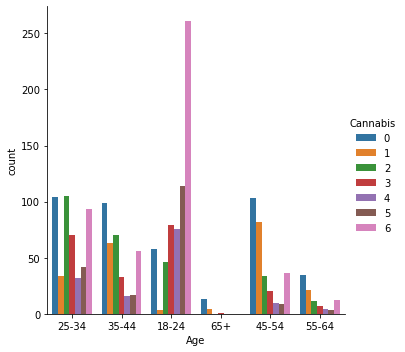

In [93]:
sns.catplot(x ="Age", hue ="Cannabis", kind ="count", data = df_Cannabis)

###### Plus on est jeune plus on a de chance de prendre du cannabis ces derniers jours

<Figure size 1080x1080 with 0 Axes>

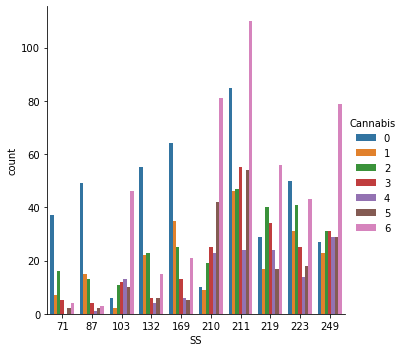

In [94]:
plt.figure(figsize=(15,15))
ax=sns.catplot(x ="SS", hue ="Cannabis", kind ="count", data = df_Cannabis)

###### sensation seeking is a personality trait defined by the search for experiences and feelings, that are "varied, novel, complex and intense", and by the readiness to "take physical, social, legal, and financial risks for the sake of such experiences.
###### It's no suprise that if you have a high score of SS, you tend to smoke cannabis recently

##### Looking for correlation between crack and the personality colomns + Gender

In [95]:
df_Crack= df[["Crack", "Age","Gender","Education_Level","Country","Ethnicity","Nscore","Extraversion",
"Oscore","Ascore","Cscore","Impulsive","SS"]]
df_Crack.corr().style.background_gradient(cmap ='coolwarm')

,Crack,Gender,Nscore,Extraversion,Oscore,Ascore,Cscore,Impulsive,SS
Crack,1.000000,-0.152931,0.122935,-0.050776,0.101086,-0.106506,-0.134363,-0.130220,0.089007
Gender,-0.152931,1.000000,0.056663,0.062208,-0.138437,0.220468,0.182376,0.067511,-0.165026
Nscore,0.122935,0.056663,1.000000,-0.433801,0.023518,-0.219546,-0.399348,-0.133679,-0.004051
Extraversion,-0.050776,0.062208,-0.433801,1.000000,0.235097,0.159563,0.318260,-0.061487,0.105032
Oscore,0.101086,-0.138437,0.023518,0.235097,1.000000,0.030832,-0.062225,-0.128703,0.233816
Ascore,-0.106506,0.220468,-0.219546,0.159563,0.030832,1.000000,0.247841,0.169079,-0.084529
Cscore,-0.134363,0.182376,-0.399348,0.318260,-0.062225,0.247841,1.000000,0.298458,-0.086835
Impulsive,-0.130220,0.067511,-0.133679,-0.061487,-0.128703,0.169079,0.298458,1.000000,-0.001644
SS,0.089007,-0.165026,-0.004051,0.105032,0.233816,-0.084529,-0.086835,-0.001644,1.000000


## **Vizualisation Df_Demographic**

### **Def function**

In [96]:
# use in th eplot function
def plot_density(dataset, col, ax, plot_gaussian = True, color="Blue"):
    ncount = len(dataset)
    
    if plot_gaussian:
        std = dataset[col].std()
        mean = dataset[col].mean()
    
    #plot histogram using seaborn
    ax = sns.histplot(dataset[col], ax=ax, color=color, kde=True, stat="probability", kde_kws={"bw_adjust":3})
    
    if plot_gaussian:
        # Limiting our gaussian to the limits from the above plot
        xmin, xmax = ax.get_xlim()
        xnorm = np.arange(xmin, xmax, 0.001)
        ynorm = norm.pdf(xnorm, mean, std)
        ax.plot(xnorm, ynorm, 'r', lw=2)
        ax.legend(["data distribution", "estimated normal distribution"], loc="upper center", bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
    
    ax.set_title(col)
    ax.set_xlabel("")

In [97]:
# Pie chart plot
def plot_pie(dataset, col, ax):  
    ax = dataset[col].value_counts().plot(kind='pie', ax=ax)
    ax.set_title(col)
    ax.set_ylabel("")

In [98]:
# countplot to get frequencies and counts
# Use in plot function
def plot_count(dataset, col, ax, order = None, show_percent=True, rotate_label = True, add_args={"palette": "Set2"}):
    ncount = len(dataset)
    
    if order is None:
        order = np.sort(dataset[col].unique())
    
    # plot seaborn countplot
    ax = sns.countplot(data=dataset, x=col, ax=ax, order=order, **add_args)
    
    # Get y limit (number of elements)
    _ ,max_nb = ax.get_ylim() #return : bottom, top (float, float)
    
    # Transform this limit into a frequency in [0, 100]
    freq_lim = (max_nb * 100/ ncount)
    
    # Duplicate the ax
    ax2 = ax.twinx()
    
    #Move duplicate y axis ticks 
    ax2.yaxis.tick_left() #to the left
    ax.yaxis.tick_right() #to the right
    
    # Swap the label positions to match the ticks
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    # Write the frequency on top of each bar
    if show_percent:
        for p in ax.patches: # for every bar
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            
            if not math.isnan(x.mean()) and not math.isnan(y):
                # Write frequency at an x and y coordinate
                ax.text(x.mean(), y, '{:.1f}%'.format(100.*y/ncount), ha='center', va='bottom')

    # Set y axis limit for counts and frequencies
    ax2.set_ylim(0,freq_lim)
    ax.set_ylim(0,max_nb)

    # set ticks for count
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    ax.yaxis.set_tick_params(which="major")

    # set ticks for frequencies
    # And use a MultipleLocator to ensure a tick spacing of (freq_lim/10)
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(freq_lim/10))
    ax2.yaxis.set_tick_params(which="major")

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    # keep only ax
    ax2.grid(False)
    ax.grid(False)
    ax.set_xlabel("")
    
    if rotate_label:
        # rotate tick labels on the x axis / / /
        _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set_title(col)

In [99]:
# Major function
# Plot wise sizes and call the wanted procedure
def plot(kind, dataset, columns=None, fig_title="Count/Frequency plots", fontsizes = 8, **kwargs):     
    
    # all the plot we can create
    kind_dict = {
        'pie': plot_pie,
        'count': plot_count,
        'density': plot_density}
    
    # If the kind of plot choose in the plot function (1st argument) isn't in the dict, then we return an error
    if kind not in kind_dict:
        raise ValueError(f"{kind} is not a valid kind, has to be one of {kind_dict.keys()}")
    
    if columns is None:
        # us all dataset columns
        columns = list(dataset.columns)
    
    fig = None
    
    # Setting font sizes
    plt.rc('xtick', labelsize=fontsizes*1.2)
    plt.rc('ytick', labelsize=fontsizes*1.2)
    plt.rc('axes', labelsize=fontsizes*1.8)
    plt.rc('legend', fontsize=fontsizes*1, title_fontsize=0)
    plt.rc('axes', titlesize=1.8*fontsizes)
    plt.rc('font', size=1.5*fontsizes)
    
    # Scale of the figure in ax (to be used later)
    figsize_scale = fontsizes
    
    if not isinstance(columns, list):
        # columns has to be a list
        if isinstance(columns, str):
            columns = [columns]
        else:
            columns = list(columns)
    
    if len(columns) == 1: # Only variable to plot
        ncols, nrows = 1, 1
        figsize_scale *= 2 # double figsize
    else:
        ncols, nrows = 2, math.ceil(len(columns) / 2)
     
    fig, axes = plt.subplots(figsize=(figsize_scale*ncols, figsize_scale*nrows), nrows=nrows, ncols=ncols)
    
    if ncols == 1 and nrows == 1:
        # We need a list of axes
        axes = np.array([axes])
    
    # Plot
    do_plots(dataset, columns, axes, kind_dict[kind], **kwargs)
    
    fig.suptitle(fig_title + "\n\n", fontsize=fontsizes*2)
    plt.tight_layout()
    #Reset plot setting to original
    sns.reset_orig()

def do_plots(dataset, columns, axes, plot_func, **kwargs):
    '''
    Calls the plotting function on every axis and removes unused axes.
    '''
    axes = axes.flat
    
    #plot every variable
    for index, col in enumerate(columns):
        plot_func(dataset, col, axes[index], **kwargs)

    # remove empty axes
    for empty in range(len(columns), len(axes)):
        axes[empty].axis("off")




### **Graphes**

In [100]:
df_demographic = df[demographic_columns]
df_demographic.head(5)

,Age,Gender,Education_Level,Country,Ethnicity
0,25-34,0,PHD,UK,White
1,35-44,0,college with degree,UK,White
2,18-24,1,masters,UK,White
3,35-44,1,PHD,UK,White
4,65+,1,quit at 18,Canada,White


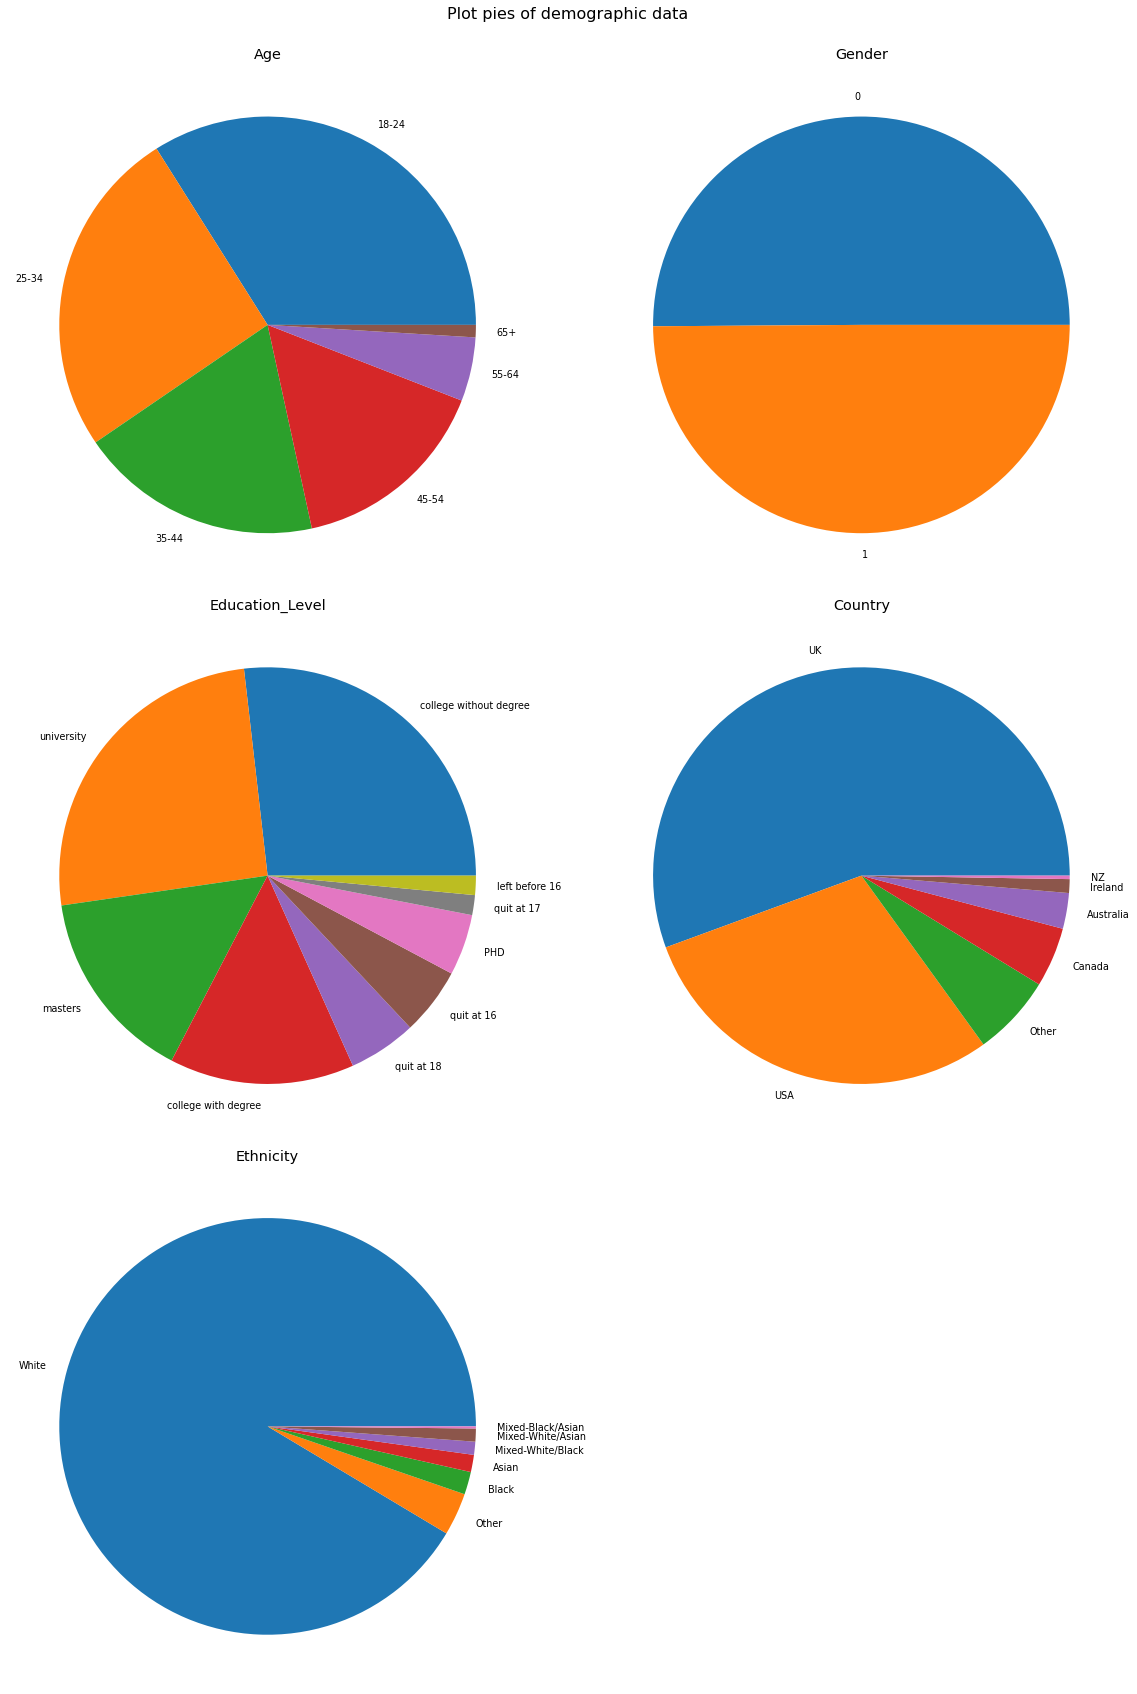

In [101]:
plot("pie", df_demographic, demographic_columns, fig_title="Plot pies of demographic data")

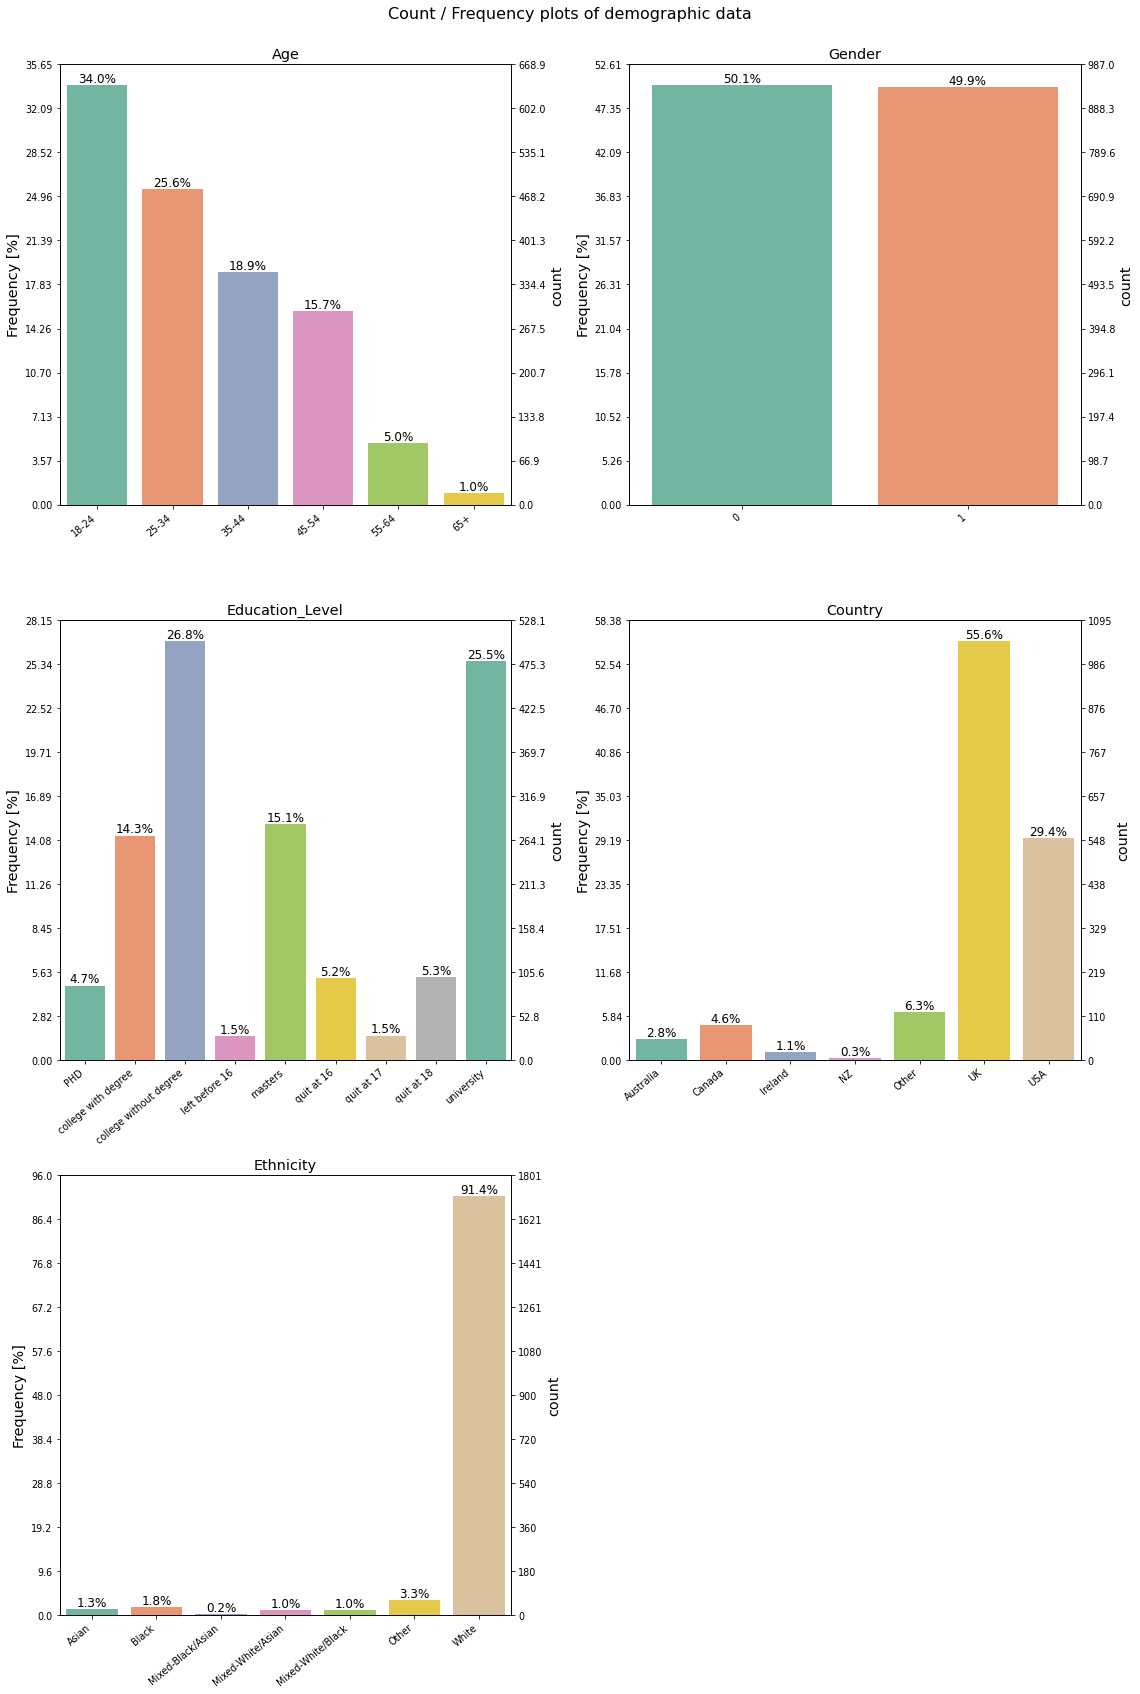

In [102]:
plot("count", df_demographic, demographic_columns, fig_title="Count / Frequency plots of demographic data")


##### We can see some features are pretty balanced but in some cases, classes are underrepresented

##### AGE: The age groups are intervals of around 10 years. As we can see, the older the age group, the less represented they are.
##### The 18-24 group holds around 1/3 of all respondents. Unbalanced and not representative

##### GENDER: Gender is balanced and representative

##### EDUCATION: There is a predomination of educated people (around 80% are of college or above level), causing an unbalance.

##### COUNTRIES: All the known countries (90+%) are English speaking with US and UK totalling to over 80% of the data.
##### This is a clear unbalance and isn't representative.

##### ETHNICITY : 90+% of respondents are white. Again, a clear unbalance and is not representative.

### Gender - Countries - Age

In [103]:
fg_Gender_Country_Age = pd.crosstab(index = df_demographic['Age'], columns= [df_demographic['Gender'], df_demographic['Country']])
fg_Gender_Country_Age

Gender          0                                           1                 \
Country Australia Canada Ireland NZ Other   UK  USA Australia Canada Ireland   
Age                                                                            
18-24          20     25       5  2    39   91  221         1      7       3   
25-34           5      8       3  2    26   80   63        10      9       2   
35-44           3      7       0  0    10  108   26         4      8       3   
45-54           3      4       3  0     5   99   22         5      7       1   
55-64           1      1       0  0     2   36   10         0      7       0   
65+             0      1       0  0     0    7    2         0      3       0   

Gender                     
Country NZ Other   UK USA  
Age                        
18-24    0    12  112  99  
25-34    1    13  200  58  
35-44    0     7  149  29  
45-54    0     4  127  14  
55-64    0     0   29   7  
65+      0     0    5   0

#### - New-Zealand doesn't have anyone over 34 years old and tested only one woman.
#### - Ireland doesn't have anyone over 54 and has no man in the 35-44 age group.
#### - Australia doesn't have anyone over 65 (and only one over 54) and 20 times more males in the 18-24 age group.
#### - Canada has 3 times more men in the 18-24 group and has only 2 males above 54.
#### - UK has over twice more women than men in the 25-34 group.
#### - USA has over twice more men in the 18-24 group and no woman over 64.
#### - Other countries have 3 times more men for the 18-24 age group, twice for the 25-34 group, doesn't have any woman in the 55-64 group and doesn't have anyone over 64.

### Education – Gender – Ethnicity

In [104]:
df_demographic.pivot_table(index='Education_Level', columns=['Gender', 'Ethnicity'], aggfunc='size', fill_value=0)

Gender                     0                                            \
Ethnicity              Asian Black Mixed-Black/Asian Mixed-White/Asian   
Education_Level                                                          
PHD                        1     0                 0                 0   
college with degree        1     5                 0                 1   
college without degree     0     4                 1                 4   
left before 16             0     0                 0                 0   
masters                    5     1                 0                 0   
quit at 16                 0     0                 0                 1   
quit at 17                 0     0                 0                 0   
quit at 18                 0     1                 0                 1   
university                 3     5                 0                 2   

Gender                                                   1        \
Ethnicity              Mixed-White/Black Other White Asian Black   
Education_Level                                                    
PHD                                    0     2    29     1     0   
college with degree                    1     6   120     0     3   
college without degree                 3    12   309     3     2   
left before 16                         0     0    16     0     0   
masters                                1     4    93     4     6   
quit at 16                             1     0    54     0     0   
quit at 17                             0     2    14     0     0   
quit at 18                             2     2    56     0     0   
university                             0     6   171     7     6   

Gender                                                                        \
Ethnicity              Mixed-Black/Asian Mixed-White/Asian Mixed-White/Black   
Education_Level                                                                
PHD                                    0                 1                 2   
college with degree                    0                 0                 0   
college without degree                 1                 2                 1   
left before 16                         0                 0                 0   
masters                                0                 3                 5   
quit at 16                             0                 0                 0   
quit at 17                             0                 0                 1   
quit at 18                             0                 0                 0   
university                             1                 4                 2   

Gender                              
Ethnicity              Other White  
Education_Level                     
PHD                        1    52  
college with degree        2   130  
college without degree     8   153  
left before 16             0    12  
masters                    5   156  
quit at 16                 2    40  
quit at 17                 0    12  
quit at 18                 2    35  
university                 8   263

##### Few entries of people leaving school at or before 18.

##### Non-white: no one left school before being 16 and appart for the 'Other' category, there is only one female that didn't get a higher education. No male** expect in 'Other' have a Doctorate degree.

##### Asian: no respondent with lower education and *no male in some college or university (but has some with masters degree, so doesn't mean no one went through university etc.)

##### Black: only one person with lower education (one male left school at 18) and has no female with a professional diploma when it is the field with most respondents on the male side.

##### Mixed-Black/Asian: very few respondents and only people following some college or university, or with an university degree are represented.

##### Mixed-White/Asian: all the female respondents have high education and 2 males left school at 18 or before. Males, unlike females have no master's degree respondent.

##### Mixed-White/Black: all females except 2 have a finished university, master's or doctorate degree, while males have only one master's degree and the other have either unfinished university degrees, a professional diploma or left school at 18 or before.

##### Other: lots of males have professional diplomas, while no female has one. There is a high number of doctorate degrees but also a high number of respondents that left school at 18 or before.

##### White: Both genders have respondents in all categories but not in the same proportions. The majority of males are pursuing a college or university degree, while the majority of females have an university degree. There are twice as many women who obtain a PHD than men.

### Genre - Country - Ethnicity

In [105]:
pd.crosstab(df_demographic['Country'], [df_demographic['Gender'], df_demographic['Ethnicity']])

Gender        0                                                              \
Ethnicity Asian Black Mixed-Black/Asian Mixed-White/Asian Mixed-White/Black   
Country                                                                       
Australia     0     0                 0                 0                 0   
Canada        0     0                 0                 0                 2   
Ireland       0     0                 0                 0                 0   
NZ            0     0                 0                 0                 0   
Other         1     0                 1                 0                 1   
UK            9    11                 0                 2                 1   
USA           0     5                 0                 7                 4   

Gender                    1                                            \
Ethnicity Other White Asian Black Mixed-Black/Asian Mixed-White/Asian   
Country                                                                 
Australia     0    32     0     0                 0                 0   
Canada        2    42     0     0                 0                 2   
Ireland       0    11     0     0                 0                 0   
NZ            0     4     0     0                 0                 0   
Other         5    74     1     1                 0                 0   
UK            4   394    11    14                 0                 5   
USA          23   305     3     2                 2                 3   

Gender                                   
Ethnicity Mixed-White/Black Other White  
Country                                  
Australia                 0     0    20  
Canada                    0     1    38  
Ireland                   0     0     9  
NZ                        0     0     1  
Other                     2     2    30  
UK                        9    12   571  
USA                       0    13   184

#### Nearly no entry of Mixed-Black/Asian. (And compared to white, no entry of any other category)

#### USA has no mixed-White/Black female, no asian and mixed-Black/Asian male.

#### All the other countries have no mixed-black asian (except one male in an 'Other' country) (even UK that has such a large number of respondents)

#### UK has 9 times more Mixed-White/Black female than male and 3 times more 'Other' female than male.

In [106]:
df.corr().style.background_gradient(cmap ='coolwarm')

,Gender,Nscore,Extraversion,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caffeine,Cannabis,Chocolat,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
Gender,1.000000,0.056663,0.062208,-0.138437,0.220468,0.182376,0.067511,-0.165026,-0.006201,-0.224801,-0.161617,-0.135791,-0.012460,-0.304118,0.074843,-0.180807,-0.152931,-0.230023,-0.137811,-0.192286,-0.317514,-0.280384,-0.180358,-0.274858,-0.195116,-0.136878
Nscore,0.056663,1.000000,-0.433801,0.023518,-0.219546,-0.399348,-0.133679,-0.004051,-0.002462,0.142439,0.031046,0.279013,0.016507,0.107502,0.012582,0.147464,0.122935,0.073008,0.180311,0.070144,0.122302,0.048640,0.190715,0.051335,0.136100,0.120471
Extraversion,0.062208,-0.433801,1.000000,0.235097,0.159563,0.318260,-0.061487,0.105032,0.091918,-0.048642,0.031387,-0.108791,0.051322,-0.021068,0.019386,0.025274,-0.050776,0.069228,-0.083889,0.011035,-0.045319,0.007627,-0.128899,0.011727,-0.023128,-0.040567
Oscore,-0.138437,0.023518,0.235097,1.000000,0.030832,-0.062225,-0.128703,0.233816,0.032820,0.218839,0.066842,0.200173,0.027469,0.414712,-0.002974,0.187352,0.101086,0.293989,0.134650,0.181800,0.316269,0.364012,0.169585,0.370925,0.190575,0.150259
Ascore,0.220468,-0.219546,0.159563,0.030832,1.000000,0.247841,0.169079,-0.084529,-0.025222,-0.154360,-0.095557,-0.172596,-0.016386,-0.151307,0.033991,-0.202367,-0.106506,-0.118119,-0.173165,-0.119535,-0.144431,-0.099516,-0.161291,-0.117037,-0.114278,-0.117334
Cscore,0.182376,-0.399348,0.318260,-0.062225,0.247841,1.000000,0.298458,-0.086835,-0.004349,-0.245710,-0.112301,-0.209105,-0.025656,-0.280232,-0.001749,-0.198475,-0.134363,-0.224762,-0.162210,-0.161019,-0.263010,-0.166740,-0.196173,-0.196235,-0.232693,-0.166914
Impulsive,0.067511,-0.133679,-0.061487,-0.128703,0.169079,0.298458,1.000000,-0.001644,-0.012853,-0.191715,-0.069120,-0.138223,-0.046454,-0.168644,-0.009962,-0.169958,-0.130220,-0.155864,-0.147524,-0.112113,-0.166767,-0.103592,-0.121134,-0.134398,-0.185165,-0.110261
SS,-0.165026,-0.004051,0.105032,0.233816,-0.084529,-0.086835,-0.001644,1.000000,0.058376,0.118036,0.097116,0.078305,0.024384,0.239474,0.003821,0.114178,0.089007,0.168377,0.033389,0.102730,0.164020,0.140274,0.045088,0.180350,0.114477,0.072536
Alcohol,-0.006201,-0.002462,0.091918,0.032820,-0.025222,-0.004349,-0.012853,0.058376,1.000000,-0.009807,0.090479,-0.010757,0.123857,0.023997,0.039430,0.091908,-0.017201,0.074306,-0.031662,0.065947,0.029066,0.013683,-0.078355,0.031477,0.061143,0.026426
Amphet,-0.224801,0.142439,-0.048642,0.218839,-0.154360,-0.245710,-0.191715,0.118036,-0.009807,1.000000,0.317845,0.500147,0.057297,0.461026,-0.061018,0.530905,0.294723,0.521060,0.361629,0.370976,0.474844,0.422693,0.398763,0.430888,0.353615,0.264754


In [107]:
df_cocaine= df[["Cocaine", "Age","Gender","Education_Level","Country","Ethnicity","Nscore","Extraversion",
"Oscore","Ascore","Cscore","Impulsive","SS"]]
df_cocaine.corr().style.background_gradient(cmap ='coolwarm')

,Cocaine,Gender,Nscore,Extraversion,Oscore,Ascore,Cscore,Impulsive,SS
Cocaine,1.000000,-0.180807,0.147464,0.025274,0.187352,-0.202367,-0.198475,-0.169958,0.114178
Gender,-0.180807,1.000000,0.056663,0.062208,-0.138437,0.220468,0.182376,0.067511,-0.165026
Nscore,0.147464,0.056663,1.000000,-0.433801,0.023518,-0.219546,-0.399348,-0.133679,-0.004051
Extraversion,0.025274,0.062208,-0.433801,1.000000,0.235097,0.159563,0.318260,-0.061487,0.105032
Oscore,0.187352,-0.138437,0.023518,0.235097,1.000000,0.030832,-0.062225,-0.128703,0.233816
Ascore,-0.202367,0.220468,-0.219546,0.159563,0.030832,1.000000,0.247841,0.169079,-0.084529
Cscore,-0.198475,0.182376,-0.399348,0.318260,-0.062225,0.247841,1.000000,0.298458,-0.086835
Impulsive,-0.169958,0.067511,-0.133679,-0.061487,-0.128703,0.169079,0.298458,1.000000,-0.001644
SS,0.114178,-0.165026,-0.004051,0.105032,0.233816,-0.084529,-0.086835,-0.001644,1.000000


In [108]:
df_Cannabis= df[["Cannabis", "Age","Gender","Education_Level","Country","Ethnicity","Nscore","Extraversion",
"Oscore","Ascore","Cscore","Impulsive","SS"]]
df_Cannabis.corr().style.background_gradient(cmap ='coolwarm')

,Cannabis,Gender,Nscore,Extraversion,Oscore,Ascore,Cscore,Impulsive,SS
Cannabis,1.000000,-0.304118,0.107502,-0.021068,0.414712,-0.151307,-0.280232,-0.168644,0.239474
Gender,-0.304118,1.000000,0.056663,0.062208,-0.138437,0.220468,0.182376,0.067511,-0.165026
Nscore,0.107502,0.056663,1.000000,-0.433801,0.023518,-0.219546,-0.399348,-0.133679,-0.004051
Extraversion,-0.021068,0.062208,-0.433801,1.000000,0.235097,0.159563,0.318260,-0.061487,0.105032
Oscore,0.414712,-0.138437,0.023518,0.235097,1.000000,0.030832,-0.062225,-0.128703,0.233816
Ascore,-0.151307,0.220468,-0.219546,0.159563,0.030832,1.000000,0.247841,0.169079,-0.084529
Cscore,-0.280232,0.182376,-0.399348,0.318260,-0.062225,0.247841,1.000000,0.298458,-0.086835
Impulsive,-0.168644,0.067511,-0.133679,-0.061487,-0.128703,0.169079,0.298458,1.000000,-0.001644
SS,0.239474,-0.165026,-0.004051,0.105032,0.233816,-0.084529,-0.086835,-0.001644,1.000000


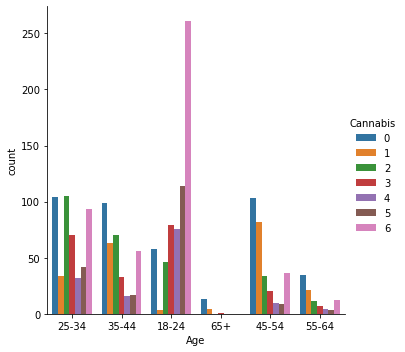

In [109]:
sns.catplot(x ="Age", hue ="Cannabis", kind ="count", data = df_Cannabis)

#### plus on est jeune plus on a de chance de prendre du cannabis recemment

<Figure size 1080x1080 with 0 Axes>

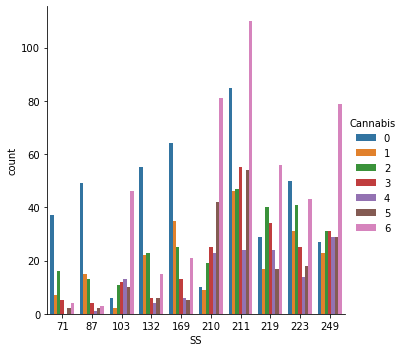

In [110]:
plt.figure(figsize=(15,15))
ax=sns.catplot(x ="SS", hue ="Cannabis", kind ="count", data = df_Cannabis)

In [111]:
df_Crack= df[["Crack", "Age","Gender","Education_Level","Country","Ethnicity","Nscore","Extraversion",
"Oscore","Ascore","Cscore","Impulsive","SS"]]
df_Crack.corr().style.background_gradient(cmap ='coolwarm')

,Crack,Gender,Nscore,Extraversion,Oscore,Ascore,Cscore,Impulsive,SS
Crack,1.000000,-0.152931,0.122935,-0.050776,0.101086,-0.106506,-0.134363,-0.130220,0.089007
Gender,-0.152931,1.000000,0.056663,0.062208,-0.138437,0.220468,0.182376,0.067511,-0.165026
Nscore,0.122935,0.056663,1.000000,-0.433801,0.023518,-0.219546,-0.399348,-0.133679,-0.004051
Extraversion,-0.050776,0.062208,-0.433801,1.000000,0.235097,0.159563,0.318260,-0.061487,0.105032
Oscore,0.101086,-0.138437,0.023518,0.235097,1.000000,0.030832,-0.062225,-0.128703,0.233816
Ascore,-0.106506,0.220468,-0.219546,0.159563,0.030832,1.000000,0.247841,0.169079,-0.084529
Cscore,-0.134363,0.182376,-0.399348,0.318260,-0.062225,0.247841,1.000000,0.298458,-0.086835
Impulsive,-0.130220,0.067511,-0.133679,-0.061487,-0.128703,0.169079,0.298458,1.000000,-0.001644
SS,0.089007,-0.165026,-0.004051,0.105032,0.233816,-0.084529,-0.086835,-0.001644,1.000000


## **Vizualisation Personality**

In [112]:
df_personality = df[personality_colomns]

#### Rappel
#### neuroticism, extraversion, openness to experience, agreeableness, conscientiousness, impulsivity, and Sensation seeking

### Proportion

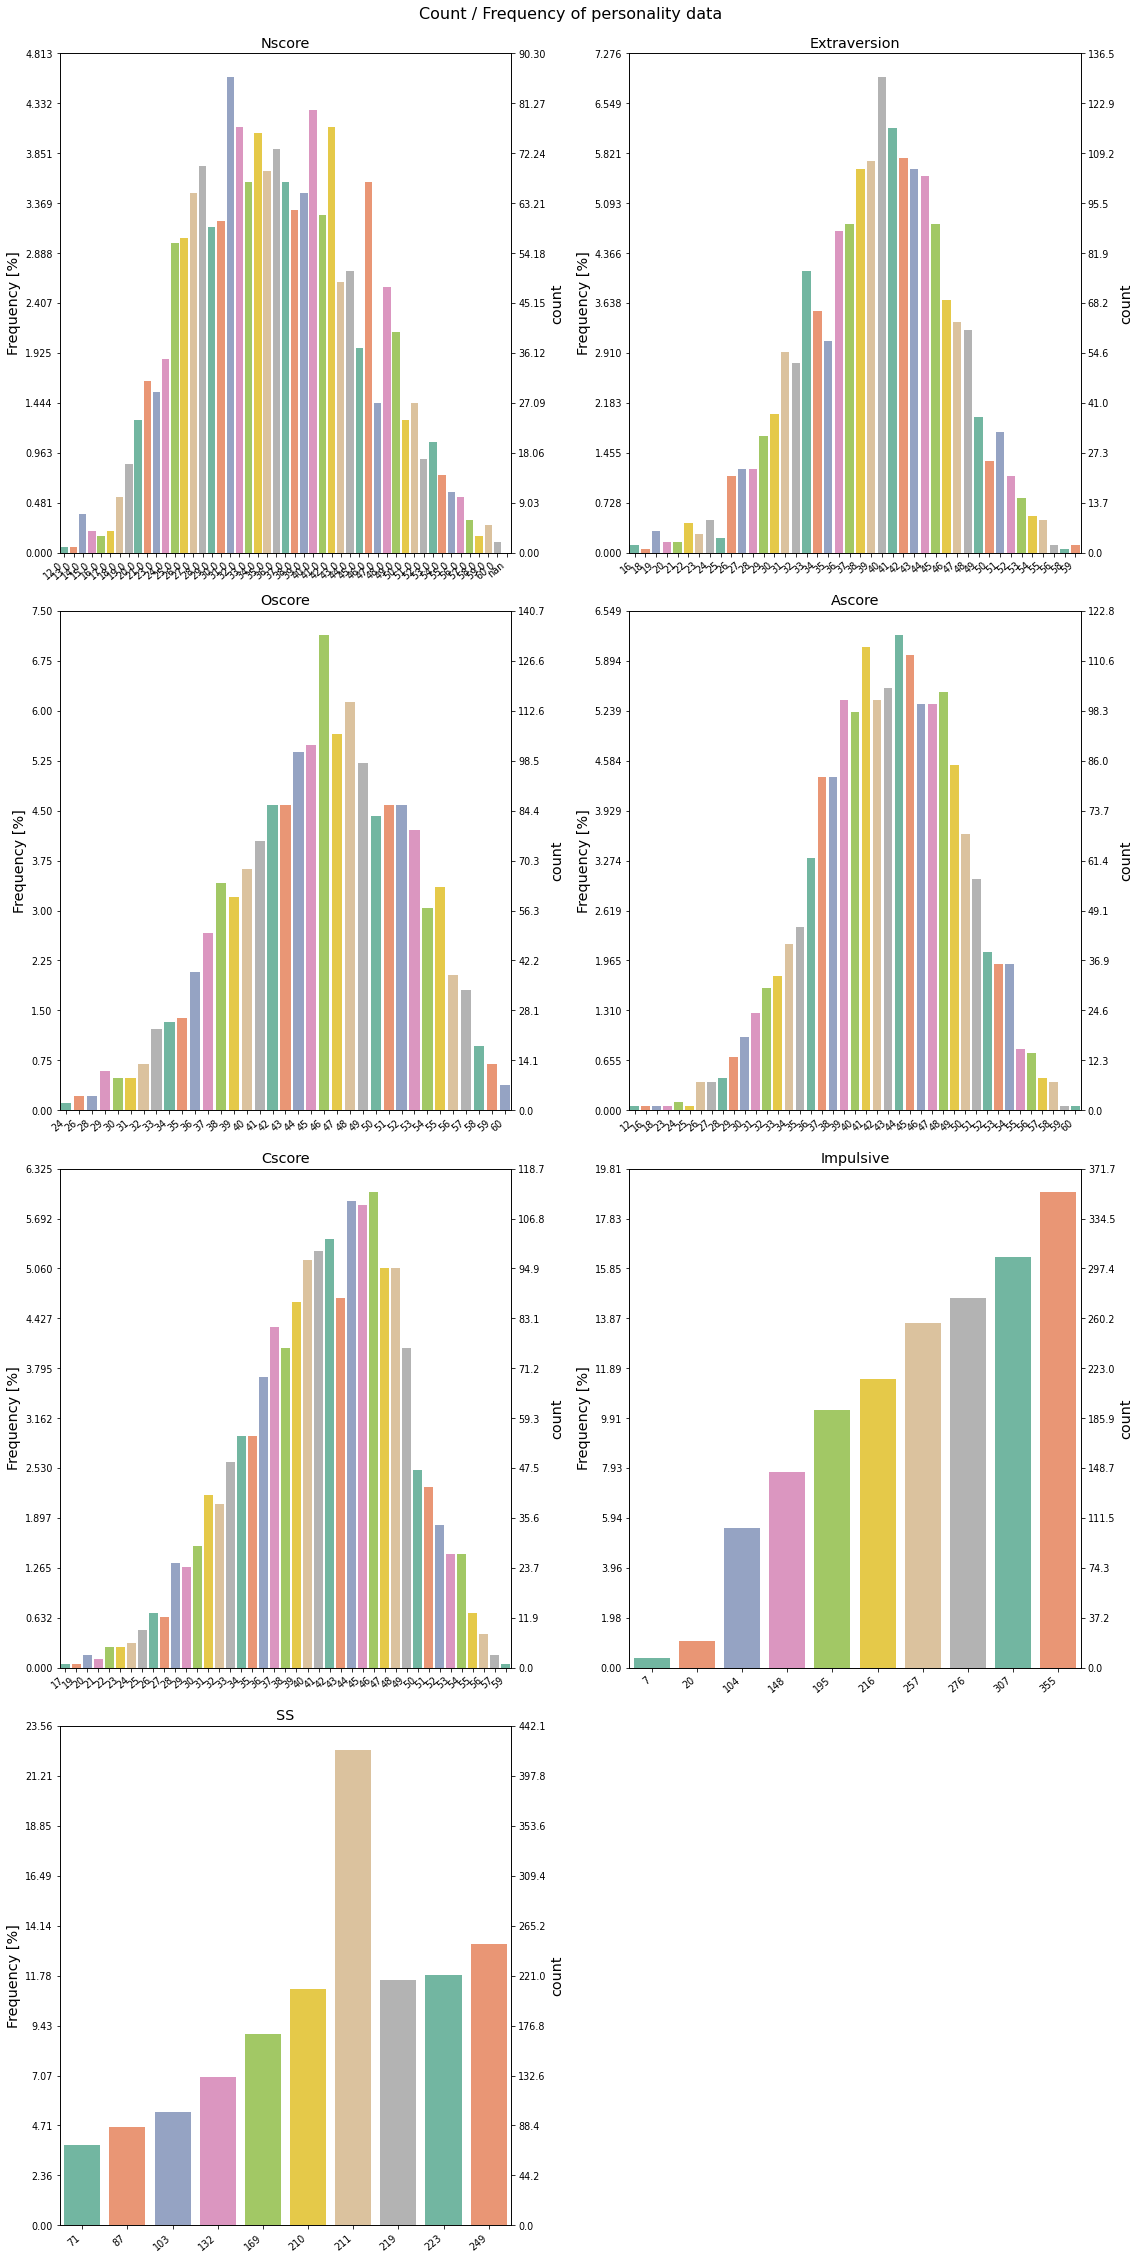

In [113]:
plot("count", df_personality, personality_colomns, show_percent=False, fig_title="Count / Frequency of personality data")

### Heatmap

In [114]:
# method - mainly pearson or spearman; nominal correlations should be calculated externally 
#         and be delivered with attribute ready=True; 

# mask - if dataset is NOT a cross-valued DataFrame of one type, mask should be set to False;

# nominal - for nominal data correlations values are in range (0, 1) instead of (-1, -1). 
#           nominal=True should be followed by ready=True 
def heatmap_corr(dataset, method='spearman', ready=False, mask=True, nominal=False):    
    if not ready:
        corr = dataset.corr(method=method) # calcul the correlation with the enter method
    elif ready:
        corr = dataset
    cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors
    vmax = corr.max().max()

    if nominal:
        center = 0.5
        cmap=None
    elif not nominal:
        center = 0
    
    if mask:
        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        np.fill_diagonal(corr.values, -2)
        vmax = corr.max().max()
    elif not mask:
        mask=None
    f, ax = plt.subplots(figsize=(20,9))
    
    return sns.heatmap(corr, cmap=cmap, mask=mask, vmax=vmax, center=center, annot=True, square=True, 
                       linewidths=0.5, cbar_kws={'shrink': 0.5})

C:\Users\remS\AppData\Local\Temp/ipykernel_2648/504836275.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

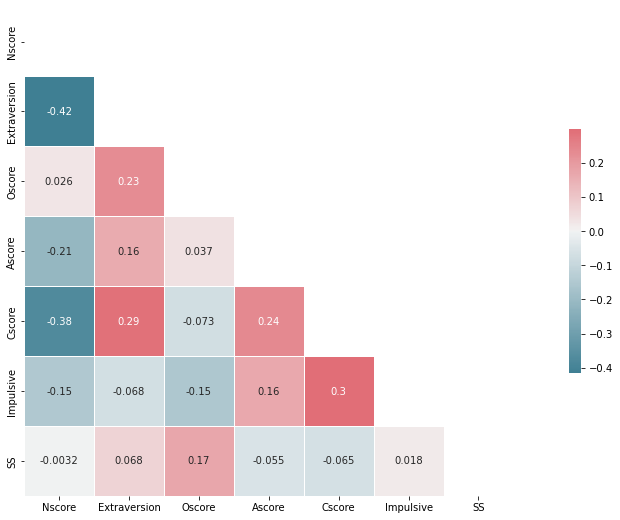

In [115]:
heatmap_corr(df_personality, method='spearman')

#### Nscore is negatively correlate to Csore (-0.38) and Extraversion (-0.42)
#### Extraversion is positively correlate to Csore (0.29)
#### Cscore is positively correlate to Impulsivity (0.3)

## **Vizualisation Df_Drugs**

In [116]:
df_drugs = df[drugs_columns]

### What do we consume ?

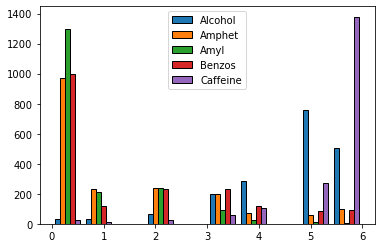

In [117]:
plt.hist(df[["Alcohol","Amphet","Amyl","Benzos","Caffeine"]], 
        label = ["Alcohol","Amphet","Amyl","Benzos","Caffeine"],
        edgecolor ="black",
        histtype = 'bar')
plt.legend()

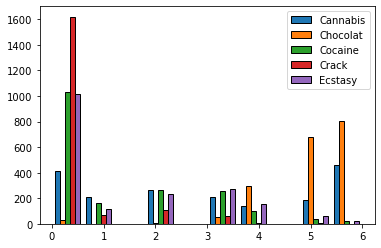

In [118]:
plt.hist(df[["Cannabis","Chocolat","Cocaine","Crack","Ecstasy"]], 
        label = ["Cannabis","Chocolat","Cocaine","Crack","Ecstasy"],
        edgecolor ="black",
        histtype = 'bar')
plt.legend()

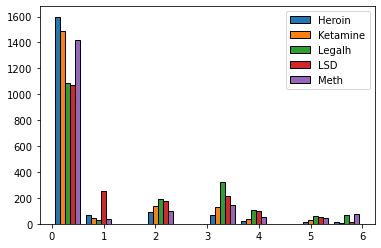

In [119]:
plt.hist(df[["Heroin","Ketamine","Legalh","LSD","Meth"]],
        label = ["Heroin","Ketamine","Legalh","LSD","Meth"],
        edgecolor ="black",
        histtype = 'bar')
plt.legend()

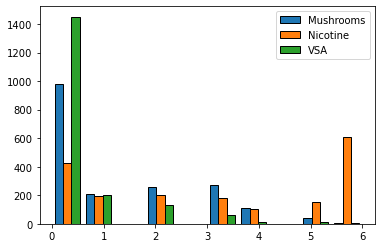

In [120]:
plt.hist(df[["Mushrooms","Nicotine","VSA"]],
        label = ["Mushrooms","Nicotine","VSA"],
        edgecolor ="black",
        histtype = 'bar')
plt.legend()

#### More than 50% people consume in majority Alcohol, Caffeine, Chocolat, Canabis, Nicotine
#### 20% population consume benzos, extasys, legalh, (mushrooms)

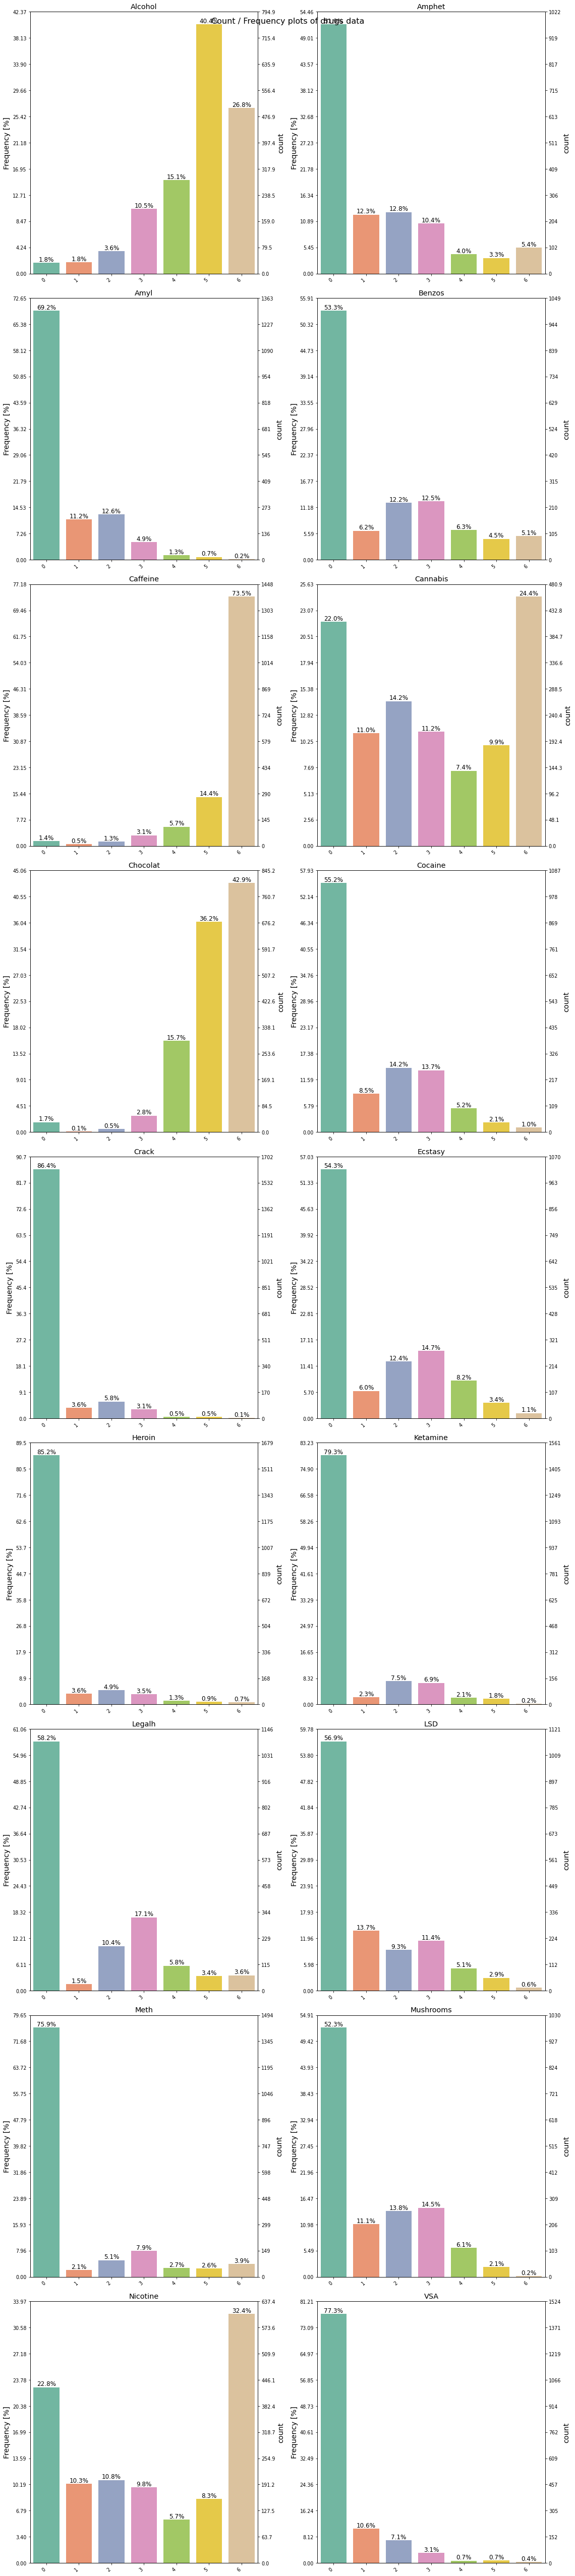

In [121]:
plot("count", df_drugs, drugs_columns, fig_title="Count / Frequency plots of drugs data")


###### Alcohol, caffeine and chocolate are legal stimulants that are consumed reguarly by the vast majority of respondents.

###### Cannabis and nicotine are distributed pretty evenly, even if there is a higher proportion at both extremes (0 and 6 category).

###### Other illegal drugs ([ "Amphet", "Amyl", "Benzos", "Cannabis", "Cocaine", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "VSA"]) except the cannabis were never tried for the vast majority of respondents, or tried a long time ago (considered as more than a month ago) People probably either never tried it  or did it once but never again.

C:\Users\remS\AppData\Local\Temp/ipykernel_2648/504836275.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

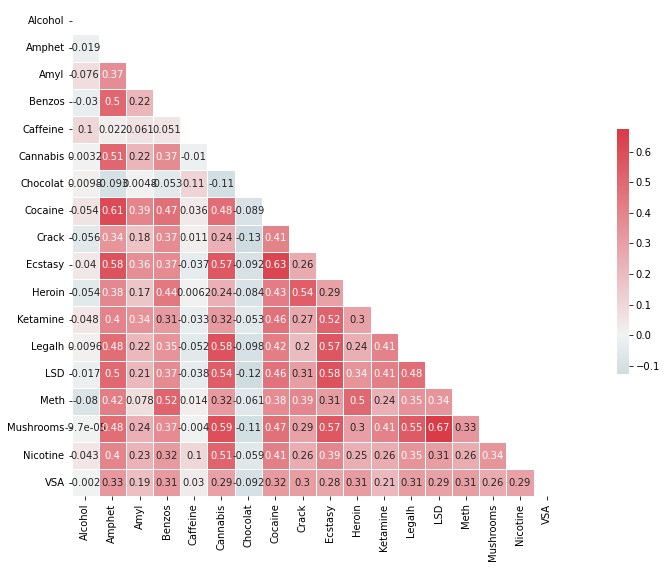

In [122]:
heatmap_corr(df_drugs, method='spearman')

###### Alcohol, caffeine, Semer and chocolate don't correlate with any other drugs (too weak or insignificant relations).

###### There are some moderate correlations with high enough statistical significance.

###### There are no strong correlations (more than 0.7)
###### If you take Amphet, you'll probably take LSD, ecstasy,cocaine,cannabis, benzos
###### If you take Benzos, you'll probably take meth, amphet
###### If you take Cannabis, you'll probably take Nicotine, Mushrooms, LSD, Legalh, ecstasy, amphet
###### If you take Cocaine, you'll probably take Ecstasy, amphet
###### If you take Crack, you'll probably take Heroine
###### If you take Ecstasy, you'll probably take Mushrooms, LSD, Lehalh, Ketamine, amphet, cannabis, cocaine
###### If you take Heroine, you'll probably take Meth, crack
###### If you take Legahl, you'll probably take Mushrooms, cannabis, ecstasy
###### If you take LSD, you'll probably take Mushrooms,  amphet,  cannabis, ecstasy
###### If you take Meth, you'll probably take benzos, Heroin
###### If you take Mushrooms, you'll probably take cannabis, ecstasy, legalh, LSD
###### If you take Nicotine, you'll probably take cannabis

In [123]:
# Returns the sorted top correlations as a Dataframe  
#    correlations - the correlations dataframe.
#    pvalues - The pvalues of H0: the correlation is unsignificant.
#    pval_threshold - alpha to compare to pvalue
#    corr_threshold - Threadshold of correlations to consider (upper or lower depending on comp_corr)
#    name_transform - transform the column names before writing index.
#    against_itself - True if columns and rows are the same data (if symmetric matrix)
#    comp_corr - comparator to compare to the corr_threshold (default operator.ge means we want correlations >=)
#    comp_pval - comparator to compare the pvalue (default operator.le meaning we want pvalues <=)
#     
def get_ranked_corr(correlations, pvalues, pval_threshold=0.05, corr_threshold=0.5, name_transform=lambda x: x, against_itself=True, comp_corr = operator.ge, comp_pval = operator.le):
        
    columns = correlations.columns
    rows = correlations.index
    pairs=[]

    for i, row in enumerate(rows):
        for j, col in enumerate(columns[i+1:], start=i+1) if against_itself else enumerate(columns):
            corr = correlations.iloc[i, j]
            if comp_pval(pvalues.iloc[i,j], pval_threshold) and comp_corr(abs(corr), corr_threshold):
                pairs.append((name_transform(row), name_transform(col), corr))
    
    list.sort(pairs, key=lambda x: abs(x[2]), reverse=True)
    return pd.Series(data=[x[2] for x in pairs], index=[' / '.join((x[0], x[1])) for x in pairs], name="Correlation", dtype=np.float64).to_frame()

In [124]:
def get_pval_code(pval):
    '''
    Returns a significance code string for a given p-value.
    '''
    code = ''
    if pval < 0.001:
        code = '***'
    elif pval < 0.01:
        code = '**'
    elif pval < 0.05:
        code = '*'
    elif pval < 0.1:
        code = '.'
    return code

In [125]:
# Returns correlation matrix extended by statistical significance index. Used for non-nominal data.
    
#    df1, df2 - DataFrames of data to correlate;
#    method - mainly pearson and spearman;
#    pvalues - if set to False, only correlation values will be returned in DataFrame 
#        (without '**' marks for significant observations)
    
def calculate_r(df1, df2, method='spearman', pvalues=True):
    
    float_precision = 3
    
    data_corr_table = pd.DataFrame()
    data_pvalues = pd.DataFrame()
    for x in df1.columns:
        for y in df2.columns:
            if method == 'pearson':
                corr = pearsonr(df1[x], df2[y])
            elif method == 'spearman':
                corr = spearmanr(df1[x], df2[y])
            else:
                raise ValueError('Unknown method')
            if pvalues:
                data_corr_table.loc[x,y] = '{} {}'.format(round(corr[0], float_precision), get_pval_code(corr[1]))
            elif not pvalues:
                data_corr_table.loc[x,y] = round(corr[0], float_precision)
            data_pvalues.loc[x,y] = corr[1]
    
    return data_corr_table, data_pvalues

<AxesSubplot:>

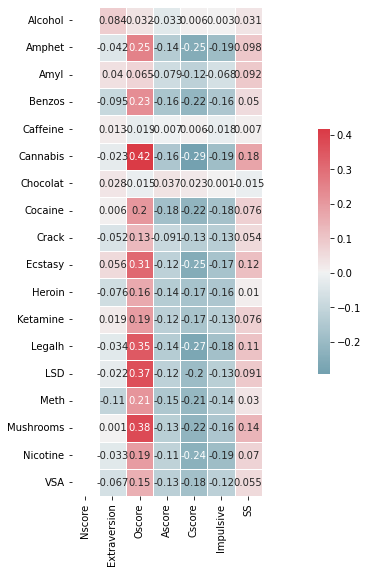

In [126]:
drug_pers_corr_table_no_pvalues, drug_pers_pvalues = calculate_r(df_drugs, df_personality, pvalues=False, method='spearman')
heatmap_corr(drug_pers_corr_table_no_pvalues, ready=True, mask=False)

In [127]:
correlation_drugs_personnality = get_ranked_corr(drug_pers_corr_table_no_pvalues, drug_pers_pvalues, corr_threshold=0.3, against_itself=False)
correlation_drugs_personnality


,Correlation
Cannabis / Oscore,0.417
Mushrooms / Oscore,0.379
LSD / Oscore,0.368
Legalh / Oscore,0.347
Ecstasy / Oscore,0.311


###### If you have a high score in openess, you might take the following drugs : Cannabis, mushrooms, LSD, Legalh, Ecstasy
###### If you have a low score in consciousness, you might take Leghal, Ecstasy, Cannabis, Amphet, Nicotine

### Correlation All_Features - Drugs

#### Heatmap correlation Cramer's V : the test V de Cramer is a measure of association between two nominal variables

In [128]:
# Returns Cramer's V correlation coefficient as a crosstable. Used for nominal data 

# V = sqrt( phi_coeff / min(k-1,r-1) ) = sqrt ((chi2_test/n) / min(k-1, r-1))
# with n is the grand total of observations 
# k being the number of columns.
# r being the number of rows.

def cramers_v(crosstab):
    # chi2_contingency() : computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies 
    # in the contingency table observed
    # chi2 : is a statistical test applied to sets of categorical data to evaluate how likely it's that any observed difference 
    # between the sets arose by chance
    chi2 = chi2_contingency(crosstab)[0] 
    n = crosstab.sum().sum()
    phi2 = chi2/n  
    r,k = crosstab.shape

    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return round(np.sqrt(phi2corr / min((kcorr-1), (rcorr-1))), 3), chi2_contingency(crosstab)[1]

In [129]:
# Returns Cramer's V coefficients matrix and p-value (obtained with Chi-square test of independence) matrix for the whole dataset.
# Function creates crosstables for every columns' combination and returns a matrix with single Cramer's V coefficients of every combination;

# With : 
# col_1_names, col_2_names : lists of names of columns to correlate. 
# pvalues : if set to False, only correlation values will be returned in DataFrame 
    
def nominal_corrs(dataset, col_1_names, col_2_names, pvalues=True):
    
    corr_table = pd.DataFrame()
    pval_table = pd.DataFrame()
    
    for i in range(len(col_1_names)):
        for j in range(len(col_2_names)):
            crosstab = pd.crosstab(dataset[col_1_names[i]], [dataset[col_2_names[j]]])
            corr, pval = cramers_v(crosstab)
            
            v = ' '.join([str(i) for i in (corr, get_pval_code(pval))]) if pvalues else corr
            
            corr_table.loc[i, j] = v
            pval_table.loc[i,j] = pval
    
    corr_table.index = col_1_names
    corr_table.columns = col_2_names
    
    pval_table.index = col_1_names
    pval_table.columns = col_2_names
    
    return corr_table, pval_table

<AxesSubplot:>

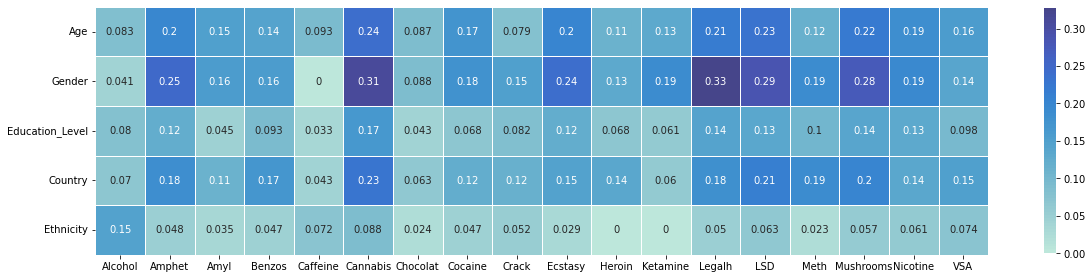

In [130]:
demo_drug_corr_table_no_pvalues, _ = nominal_corrs(df, demographic_columns, drugs_columns, pvalues=False)
heatmap_corr(demo_drug_corr_table_no_pvalues, ready=True, mask=False, nominal=True)

###### Gender will be a good features to predict cannabis, legalh, LSD, Amphet and Mushrooms
###### Country will be a good features to predict amphet, cannabisn  LSD, Mushrooms
###### Age will be a good features to predict Amphet, cannabis, ecstasy, legalh, LSD, Mushrooms, Nicotine

<AxesSubplot:>

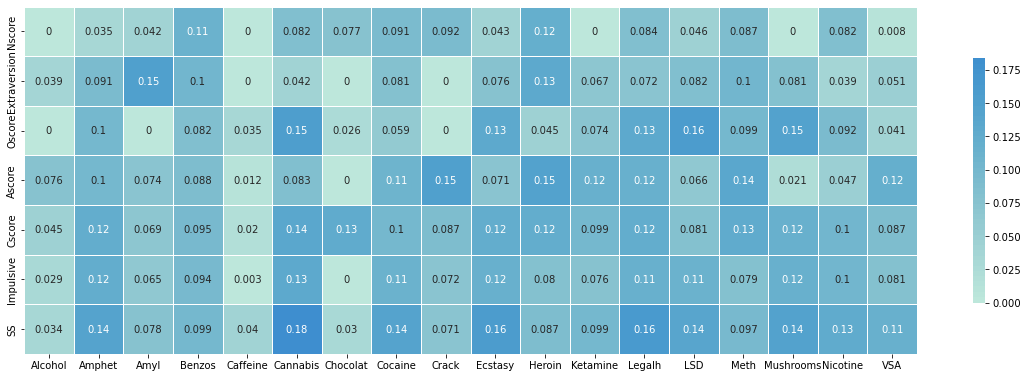

In [131]:
perso_drug_corr_table_no_pvalues, _ = nominal_corrs(df, personality_colomns, drugs_columns, pvalues=False)
heatmap_corr(perso_drug_corr_table_no_pvalues, ready=True, mask=False, nominal=True)

###### Personnality features don"t seem to be to important to predict drug consuption

## **Binary Classification**

## *Consumer - Non Consumer*

In [132]:
dataset_decade = df.copy()
for i in drugs_columns:
    dataset_decade[i] = ["Non Consumer" if c < 2 else "Consumer" for c in df[i]]
    
dataset_year = df.copy()
for i in drugs_columns:
    dataset_year[i] = ["Non Consumer" if c < 3 else "Consumer" for c in df[i]]
    
compare_year_decade = pd.concat([dataset_decade.assign(split="decade"), dataset_year.assign(split="year")])

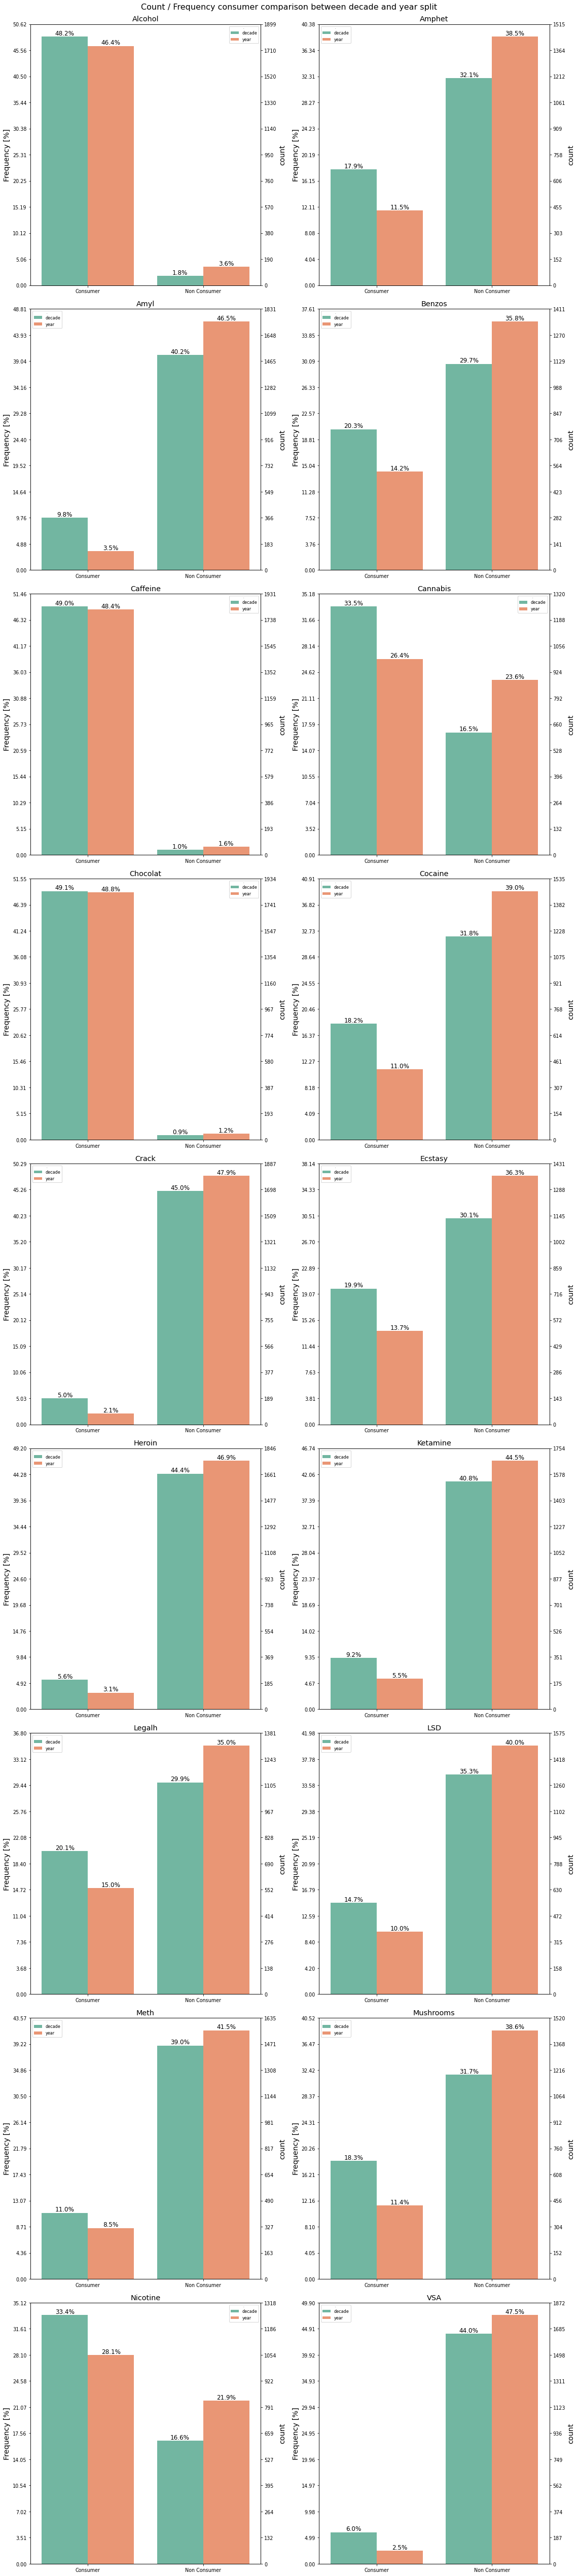

In [133]:
plot("count", compare_year_decade, drugs_columns, fig_title="Count / Frequency consumer comparison between decade and year split\n\n\n", rotate_label=False, add_args={"hue": "split", "palette": "Set2"})

In [134]:
df_binaire = df.copy()

for i in drugs_columns:
    df_binaire[i] = ["Non Consumer" if c < 2 else "Consumer" for c in df[i]]

In [135]:
df_binaire_gr = pd.DataFrame()
for drug in drugs_columns:
    df_binaire_gr = pd.concat([df_binaire_gr, df_binaire.groupby(drug).size()], axis=1)
df_binaire_gr.columns = drugs_columns

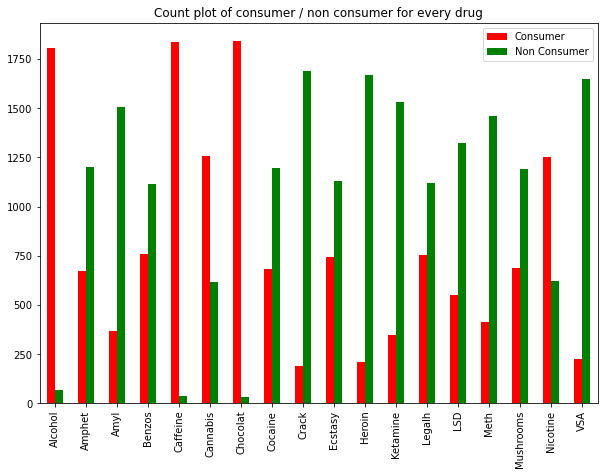

In [136]:
df_binaire_gr.T.plot.bar(color=['red', 'green'], figsize=(10,7), title="Count plot of consumer / non consumer for every drug");


### *Decade vs year*

In [137]:
grouped_df_decade = pd.DataFrame()
for drug in drugs_columns:
    grouped_df_decade = pd.concat([grouped_df_decade, dataset_decade.groupby(drug).size()], axis=1)
grouped_df_decade.columns = drugs_columns

grouped_df_year = pd.DataFrame()
for drug in drugs_columns:
    grouped_df_year = pd.concat([grouped_df_year, dataset_year.groupby(drug).size()], axis=1)
grouped_df_year.columns = drugs_columns

<AxesSubplot:title={'center':'Count plot of consumer / non consumer for every drug in the last decade'}>

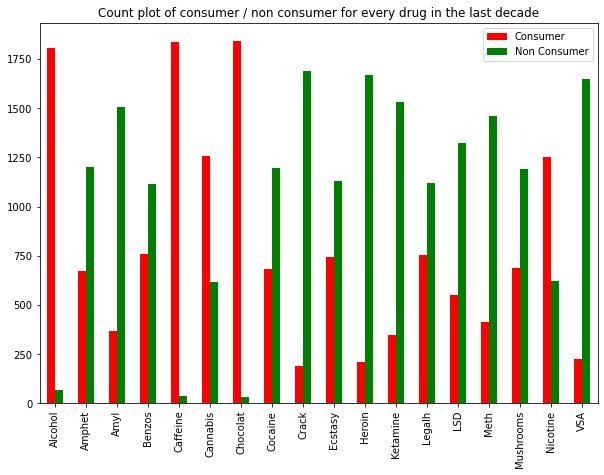

In [138]:
grouped_df_decade.T.plot.bar(color=['red', 'green'], figsize=(10,7), title="Count plot of consumer / non consumer for every drug in the last decade")

<AxesSubplot:title={'center':'Count plot of consumer / non consumer for every drug in the last year'}>

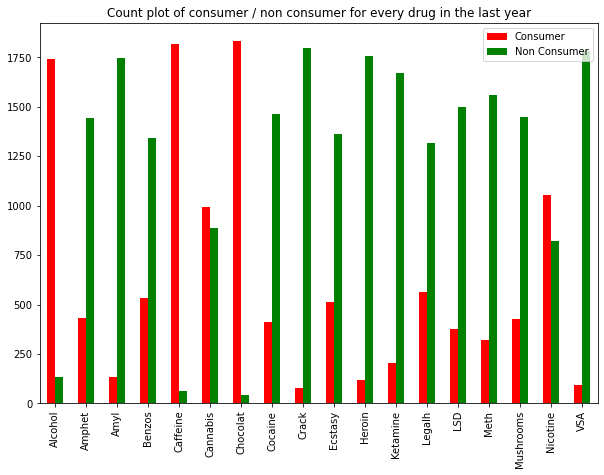

In [139]:
grouped_df_year.T.plot.bar(color=['red', 'green'], figsize=(10,7), title="Count plot of consumer / non consumer for every drug in the last year")


## *Consumer 1 - Non consumer 0*


### *Count of individual per number of drug used*

###### 0, #Never Used ; 1, #Over a decade ; 2, # Last decade ; 3, # Last year ; 4, #Last month ; 5, # Last week ; 6, #Last day

###### We choose to split consumer and not consumer in decade and year. It means that we'll easily see if you consume a drug in the past decade or if you consume during the year. This way we'll see if there is an acceleration of the consuption (the age is obviously a parameter). We must compare the consuption of a 35 year-old person in the last decade, so when he was 25 year old (dataset_decade), with the consumption of an actual 25 years old (dataset_year). It's one of the many possible things we can look at

In [140]:
for i in drugs_columns:
    dataset_decade[i] = [0 if c < 2 else 1 for c in df[i]]
    
for i in drugs_columns:
    dataset_year[i] = [0 if c < 3 else 1 for c in df[i]]
    
df_compare_year_decade = pd.concat([dataset_decade.assign(split="decade"), dataset_year.assign(split="year")])

###### We take dataset_year for the general analysis. So we consider that if you consume a drug this year, you must be a consumer, otherwise you're not.

In [141]:
np_drugs = np.array([drug.split(' ', -1)[0] for drug in drugs_columns])

# Combination [names of used drugs by the individual, the index of the drugs in the df, total number of drugs used, split]
df_year_nb_drugs = dataset_year[drugs_columns].apply(
    lambda x: pd.Series({
        'names':'/'.join(np_drugs[x.values.astype(bool)]), 
        'index': np.where(x.values)[0], 
        'number of drugs': x.values.sum()}), axis=1)


df_year_nb_drugs.head()

,names,index,number of drugs
0,Alcohol/Caffeine/Cannabis/Chocolat/Cocaine/Ecs...,"[0, 4, 5, 6, 7, 9, 14, 16]",8
1,Alcohol/Caffeine/Cannabis/Chocolat,"[0, 4, 5, 6]",4
2,Alcohol/Benzos/Caffeine/Chocolat,"[0, 3, 4, 6]",4
3,Alcohol/Caffeine/Cannabis/Chocolat,"[0, 4, 5, 6]",4
4,Caffeine/Chocolat/Nicotine,"[4, 6, 16]",3


In [142]:
dico_nb_drugs = {}
for number in df_year_nb_drugs['number of drugs']:
    test = df_year_nb_drugs['number of drugs'] == number
    count = 0
    
    if number not in dico_nb_drugs:
        for i in test:
            if i == True:
                count +=1
        dico_nb_drugs[number] =count
    

df_count_nb_drugs = pd.DataFrame(list(dico_nb_drugs.items()), columns=['Number of drugs', 'Count']).sort_values("Count", ascending=False)
df_count_nb_drugs

,Number of drugs,Count
2,3,494
1,4,256
5,5,181
3,6,130
7,7,124
0,8,122
8,9,112
10,10,105
9,11,84
6,2,73


###### sur la dernière année il est plus courrant de consommer de 3 à 5 drogues.

In [143]:
def value_counts_percentage(dataset, column):
    a = dataset[column].value_counts()
    b = dataset[column].value_counts(normalize=True) * 100
    
    return pd.concat([a,b.round(2)], axis=1, keys=['Count', 'Percentage %'])

In [144]:
value_count_pourc_year = value_counts_percentage(df_year_nb_drugs, 'names')
value_count_pourc_year.head(5)

,Count,Percentage %
Alcohol/Caffeine/Chocolat,452,24.09
Alcohol/Caffeine/Chocolat/Nicotine,148,7.89
Alcohol/Caffeine/Cannabis/Chocolat/Nicotine,84,4.48
Caffeine/Chocolat,38,2.03
Alcohol/Benzos/Caffeine/Chocolat,34,1.81


In [145]:
value_count_pourc_year.shape

(651, 2)

###### There ies 655 groups/combinaisons

## **Modeling**

### Import libraries

In [146]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib as mpl
import math
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_ind, mannwhitneyu, norm, normaltest, shapiro, anderson
import operator
from IPython.display import HTML, display
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

In [147]:
df_for_modelling = df.copy()

### Cleaning the Dataset for Modeling

In [148]:
ages = {"18-24": 18,
        "25-34": 25,
        "35-44": 35,
        "45-54": 45,
        "55-64": 55,
        "65+": 65}
df_for_modelling['Age'] = df_for_modelling['Age'].map(ages)

In [149]:
studies = {"left before 16": 0,
        "quit at 16": 1,
        "quit at 17": 2,
        "quit at 18": 3,
        "college without degree": 4,
        "college with degree": 5,
        "university": 6,
        "masters": 7,
        "PHD" : 8}
df_for_modelling['Education_Level'] = df_for_modelling['Education_Level'].map(studies)

In [150]:
countries = {"Australia" : 0,
        "Canada" :1,
        "NZ": 2,
        "Other": 3,
        "Ireland":4,
         "UK": 5,
        "USA": 6}
df_for_modelling['Country'] = df_for_modelling['Country'].map(countries)

In [151]:
ethnicies = {"Asian":0, 
        "Black":1,
        "Mixed-Black/Asian":2,
        "Mixed-White/Asian":3,
        "Mixed-White/Black":4,
        "Other":5, 
        "White":6}
df_for_modelling['Ethnicity'] = df_for_modelling['Ethnicity'].map(ethnicies)

In [152]:
df_for_modelling= df_for_modelling.dropna()

In [153]:
df_for_modelling.isnull().sum()

Age                0
Gender             0
Education_Level    0
Country            0
Ethnicity          0
Nscore             0
Extraversion       0
Oscore             0
Ascore             0
Cscore             0
Impulsive          0
SS                 0
Alcohol            0
Amphet             0
Amyl               0
Benzos             0
Caffeine           0
Cannabis           0
Chocolat           0
Cocaine            0
Crack              0
Ecstasy            0
Heroin             0
Ketamine           0
Legalh             0
LSD                0
Meth               0
Mushrooms          0
Nicotine           0
VSA                0
dtype: int64

In [154]:
df_for_modelling

,Age,Gender,Education_Level,Country,Ethnicity,Nscore,Extraversion,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,25,0,8,5,6,29.0,52,55,48,41,...,0,4,0,2,0,2,3,0,4,0
1,35,0,5,5,6,31.0,45,40,32,34,...,0,0,0,0,0,0,0,1,0,0
2,18,1,7,5,6,34.0,34,46,47,46,...,0,0,0,2,0,0,0,0,2,0
3,35,1,8,5,6,43.0,28,43,41,50,...,0,1,0,0,1,0,0,2,2,0
4,65,1,3,1,6,29.0,38,35,55,52,...,0,0,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18,1,4,6,6,25.0,51,57,48,33,...,0,0,0,0,3,3,0,0,0,5
1880,18,0,4,6,6,33.0,51,50,48,30,...,0,2,0,0,3,5,4,4,5,0
1881,25,1,6,6,6,47.0,30,37,31,31,...,0,4,0,2,0,2,0,2,6,0
1882,18,1,4,6,6,45.0,26,48,32,22,...,0,3,0,0,3,3,0,3,4,0


In [155]:
for i in drugs_columns:
    df_for_modelling[i] = [0 if c < 3 else 1 for c in df_for_modelling[i]]
df_for_modelling

,Age,Gender,Education_Level,Country,Ethnicity,Nscore,Extraversion,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,25,0,8,5,6,29.0,52,55,48,41,...,0,1,0,0,0,0,1,0,1,0
1,35,0,5,5,6,31.0,45,40,32,34,...,0,0,0,0,0,0,0,0,0,0
2,18,1,7,5,6,34.0,34,46,47,46,...,0,0,0,0,0,0,0,0,0,0
3,35,1,8,5,6,43.0,28,43,41,50,...,0,0,0,0,0,0,0,0,0,0
4,65,1,3,1,6,29.0,38,35,55,52,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18,1,4,6,6,25.0,51,57,48,33,...,0,0,0,0,1,1,0,0,0,1
1880,18,0,4,6,6,33.0,51,50,48,30,...,0,0,0,0,1,1,1,1,1,0
1881,25,1,6,6,6,47.0,30,37,31,31,...,0,1,0,0,0,0,0,0,1,0
1882,18,1,4,6,6,45.0,26,48,32,22,...,0,1,0,0,1,1,0,1,1,0


### LogisticRegression()

#### All features

In [156]:
df_test_X = df_for_modelling[["Age", "Gender", "Education_Level", "Country", "Ethnicity", "Nscore", "Extraversion", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]]

In [206]:
tab_models_regr_all_features= []
scores_train =[]
scores_test =[] 
Y_pred_tab= []

for drugs in drugs_columns:
    X_train, X_test, Y_train, Y_test = train_test_split(df_test_X, df_for_modelling[[drugs]], test_size=0.3)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train) # tableau de tableaux
    X_test = scaler.transform(X_test) # tableau de tableaux

    logreg = LogisticRegression()
    model_logreg = logreg.fit(X_train, Y_train)
    tab_models_regr_all_features.append(model_logreg)
    

    Y_pred_tab.append(model_logreg.predict(X_test))

    scores_train.append(model_logreg.score(X_train, Y_train) * 100)
    scores_test.append(model_logreg.score(X_test, Y_test) * 100)
    

C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [158]:
print("Mean train:", np.mean(scores_train))
print("Mean test:", np.mean(scores_test))

Mean train: 85.34105534105532
Mean test: 85.28528528528528


In [159]:
df_pred_regr = pd.DataFrame({
    'Drugs': ["Alcohol","Amphet","Amyl","Benzos","Caffeine","Cannabis","Chocolat","Cocaine","Crack","Ecstasy","Heroin","Ketamine",
            "Legalh","LSD","Meth","Mushrooms","Nicotine","VSA" ],
    'Y pred': [Y_pred_tab[0],Y_pred_tab[1],Y_pred_tab[2], Y_pred_tab[3],Y_pred_tab[4], Y_pred_tab[5],Y_pred_tab[6], Y_pred_tab[7],Y_pred_tab[8],Y_pred_tab[9],Y_pred_tab[10],Y_pred_tab[11], Y_pred_tab[12],Y_pred_tab[13], Y_pred_tab[14],
    Y_pred_tab[15],Y_pred_tab[16],Y_pred_tab[17]]})
df_pred_regr.head()

,Drugs,Y pred
0,Alcohol,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Amphet,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Amyl,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Benzos,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,Caffeine,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


#### Now we are going to show the prediction as a list of drugs each individual takes (what we'll do at the end)

In [160]:
df_test_regr_pred = df_for_modelling.copy().head(900)
df_test_regr_pred= df_test_regr_pred.drop(labels= df_drugs, axis =1)
X_test = scaler.transform(df_test_regr_pred)

tab_pred_regr=[]
for i in range(len(drugs_columns)):
    tab_pred_regr.append(tab_models_regr_all_features[i].predict(X_test))

In [161]:
index_drugs_per_individu = []

for j in range(len(df_test_regr_pred)): # on regarde tous les individus
    index_drugs = []
    for i in range(len(tab_pred_regr)): # pour toutes les drogues. len(tab_pred_regr) = 19
        if tab_pred_regr[i][j] == 1:
            if i == 0:
                index_drugs.append('Alcohol')
            if i == 1:
                index_drugs.append('Amphet')
            if i == 2:
                index_drugs.append('Amyl')
            if i == 3:
                index_drugs.append('Benzos')
            if i == 4:
                index_drugs.append('Caffeine')
            if i == 5:
                index_drugs.append('Cannabis')
            if i == 6:
                index_drugs.append('Chocolat')
            if i == 7:
                index_drugs.append('Cocaine')
            if i == 8:
                index_drugs.append('Crack')
            if i == 9:
                index_drugs.append('Ecstasy')
            if i == 10:
                index_drugs.append('Heroin')
            if i == 11:
                index_drugs.append('Ketamine')
            if i == 12:
                index_drugs.append('Legalh')
            if i == 13:
                index_drugs.append('LSD')
            if i == 14:
                index_drugs.append('Meth')
            if i == 15:
                index_drugs.append('Mushrooms')
            if i == 16:
                index_drugs.append('Nicotine')
            if i == 17:
                index_drugs.append('Semer')
            if i == 18:
                index_drugs.append('VSA')
    index_drugs_per_individu.append(index_drugs)

In [162]:
df_resultat = pd.DataFrame(index_drugs_per_individu)
df_resultat=df_resultat.fillna('-')
df_resultat.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Alcohol,Caffeine,Cannabis,Chocolat,Legalh,Nicotine,-,-,-,-,-,-,-,-
1,Alcohol,Caffeine,Cannabis,Chocolat,Nicotine,-,-,-,-,-,-,-,-,-
2,Alcohol,Caffeine,Chocolat,-,-,-,-,-,-,-,-,-,-,-
3,Alcohol,Caffeine,Chocolat,-,-,-,-,-,-,-,-,-,-,-
4,Alcohol,Caffeine,Chocolat,-,-,-,-,-,-,-,-,-,-,-


#### All features except ethnicity

In [163]:
df_test_X_2 = df_for_modelling[["Age","Gender","Education_Level","Country", "Nscore","Extraversion","Oscore","Ascore","Cscore","Impulsive","SS"]]

In [164]:
tab_models_regr_without_ethnicity= []
scores_train_2 =[]
scores_test_2 =[] 
Y_pred_tab_without_ethnicity=[]
for drugs in drugs_columns:
    X_train, X_test, Y_train, Y_test = train_test_split(df_test_X_2, df_for_modelling[[drugs]], test_size=0.3)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train) # tableau de tableaux
    X_test = scaler.transform(X_test) # tableau de tableaux

    logreg = LogisticRegression()
    logreg.fit(X_train, Y_train)
    tab_models_regr_without_ethnicity.append(logreg)
    
    Y_pred_tab_without_ethnicity.append(logreg.predict(X_test))


    scores_train_2.append(logreg.score(X_train, Y_train) * 100)
    scores_test_2.append(logreg.score(X_test, Y_test) * 100)


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [165]:
print("Mean train:", np.mean(scores_train_2))
print("Mean test:", np.mean(scores_test_2))

Mean train: 85.3110253110253
Mean test: 84.97497497497496


In [166]:
df_test_regr_pred_without_ethni = df_for_modelling.copy().head(900)
df_test_regr_pred_without_ethni = df_test_regr_pred_without_ethni.drop(labels= df_drugs, axis =1)
df_test_regr_pred_without_ethni = df_test_regr_pred_without_ethni.drop(labels= "Ethnicity", axis =1)
X_test = scaler.transform(df_test_regr_pred_without_ethni)

tab_pred_regr_without_ethni = []
for i in range(len(drugs_columns)):
    tab_pred_regr_without_ethni.append(tab_models_regr_without_ethnicity[i].predict(X_test))

In [167]:
index_drugs_per_individu_without_ethni = []

for j in range(len(df_test_regr_pred)): # on regarde tous les individus
    index_drugs = []
    for i in range(len(tab_pred_regr)): # pour toutes les drogues. len(tab_pred_regr) = 19
        if tab_pred_regr[i][j] == 1:
            if i == 0:
                index_drugs.append('Alcohol')
            if i == 1:
                index_drugs.append('Amphet')
            if i == 2:
                index_drugs.append('Amyl')
            if i == 3:
                index_drugs.append('Benzos')
            if i == 4:
                index_drugs.append('Caffeine')
            if i == 5:
                index_drugs.append('Cannabis')
            if i == 6:
                index_drugs.append('Chocolat')
            if i == 7:
                index_drugs.append('Cocaine')
            if i == 8:
                index_drugs.append('Crack')
            if i == 9:
                index_drugs.append('Ecstasy')
            if i == 10:
                index_drugs.append('Heroin')
            if i == 11:
                index_drugs.append('Ketamine')
            if i == 12:
                index_drugs.append('Legalh')
            if i == 13:
                index_drugs.append('LSD')
            if i == 14:
                index_drugs.append('Meth')
            if i == 15:
                index_drugs.append('Mushrooms')
            if i == 16:
                index_drugs.append('Nicotine')
            if i == 17:
                index_drugs.append('Semer')
            if i == 18:
                index_drugs.append('VSA')
    index_drugs_per_individu_without_ethni.append(index_drugs)


In [168]:
df_resultat_without_ethni = pd.DataFrame(index_drugs_per_individu_without_ethni)
df_resultat_without_ethni=df_resultat.fillna('-')
df_resultat_without_ethni.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Alcohol,Caffeine,Cannabis,Chocolat,Legalh,Nicotine,-,-,-,-,-,-,-,-
1,Alcohol,Caffeine,Cannabis,Chocolat,Nicotine,-,-,-,-,-,-,-,-,-
2,Alcohol,Caffeine,Chocolat,-,-,-,-,-,-,-,-,-,-,-
3,Alcohol,Caffeine,Chocolat,-,-,-,-,-,-,-,-,-,-,-
4,Alcohol,Caffeine,Chocolat,-,-,-,-,-,-,-,-,-,-,-


#### Without personnality informations except Oscore, impulsive and SS

In [169]:
df_test_X_3 = df_for_modelling[["Age","Gender","Education_Level","Country","Oscore","Impulsive","SS"]]

In [170]:
scores_train_3 =[]
scores_test_3 =[] 

for drugs in drugs_columns:
    X_train, X_test, Y_train, Y_test = train_test_split(df_test_X_3, df_for_modelling[[drugs]], test_size=0.3)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train) # tableau de tableaux
    X_test = scaler.transform(X_test) # tableau de tableaux

    logreg = LogisticRegression()
    logreg.fit(X_train, Y_train)

    Y_pred = logreg.predict(X_test)

    scores_train_3.append(logreg.score(X_train, Y_train) * 100)
    scores_test_3.append(logreg.score(X_test, Y_test) * 100)

C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [171]:
print(scores_train_3, "\nMean train:", np.mean(scores_train_3) )
print(scores_test_3, "\nMean test:", np.mean(scores_test_3))

[92.81853281853282, 77.14285714285715, 92.74131274131274, 69.96138996138997, 96.52509652509652, 76.37065637065638, 97.68339768339769, 77.22007722007721, 95.5984555984556, 76.75675675675676, 93.74517374517374, 89.42084942084942, 78.37837837837837, 82.16216216216216, 82.08494208494209, 81.08108108108108, 71.04247104247105, 95.21235521235522] 
Mean train: 84.77477477477478
[92.61261261261261, 80.18018018018019, 93.15315315315316, 75.31531531531532, 97.11711711711712, 78.55855855855856, 97.47747747747748, 77.83783783783784, 96.3963963963964, 77.11711711711712, 93.69369369369369, 88.28828828828829, 77.47747747747748, 81.08108108108108, 84.86486486486487, 78.37837837837837, 68.46846846846847, 94.77477477477477] 
Mean test: 85.15515515515517


#### Without personnality except Impulsivity & SS

In [172]:
df_test_X_4 = df_for_modelling[["Age","Gender","Education_Level","Country","SS"]]

In [173]:
scores_train_4 =[]
scores_test_4 =[] 

for drugs in drugs_columns:
    X_train, X_test, Y_train, Y_test = train_test_split(df_test_X_4, df_for_modelling[[drugs]], test_size=0.3)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train) # tableau de tableaux
    X_test = scaler.transform(X_test) # tableau de tableaux

    logreg = LogisticRegression()
    logreg.fit(X_train, Y_train)

    Y_pred = logreg.predict(X_test)

    # print('train score for the', drugs, logreg.score(X_train, Y_train) * 100)
    # print('test scorefor the', drugs, logreg.score(X_test, Y_test) * 100,"\n\n")

    scores_train_4.append(logreg.score(X_train, Y_train) * 100)
    scores_test_4.append(logreg.score(X_test, Y_test) * 100)

C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [174]:
print(scores_train_4, "\nMean train:",np.mean(scores_train_4))
print(scores_test_4, "\nMean test:",np.mean(scores_test_4))

[91.8918918918919, 76.83397683397683, 93.05019305019306, 72.50965250965251, 96.91119691119691, 72.89575289575289, 97.83783783783784, 78.84169884169884, 95.83011583011583, 76.75675675675676, 93.66795366795367, 89.1891891891892, 78.06949806949807, 79.38223938223939, 84.24710424710425, 78.76447876447877, 65.71428571428571, 95.52123552123552] 
Mean train: 84.32861432861434
[94.77477477477477, 76.03603603603604, 92.43243243243244, 69.1891891891892, 96.21621621621622, 73.15315315315316, 97.11711711711712, 75.31531531531532, 95.85585585585585, 73.15315315315316, 93.87387387387388, 88.82882882882883, 75.49549549549549, 78.37837837837837, 80.18018018018019, 79.27927927927928, 69.54954954954955, 94.05405405405406] 
Mean test: 83.49349349349349


#### Comparaison Array

In [175]:
tab_comparaison_test = [round(np.mean(scores_test),2), round(np.mean(scores_test_2),2), round(np.mean(scores_test_3),2), round(np.mean(scores_test_4),2)]
tab_comparaison_train = [round(np.mean(scores_train),2), round(np.mean(scores_train_2),2), round(np.mean(scores_train_3),2), round(np.mean(scores_train_4),2)]
print("Test:",tab_comparaison_test,"\nTrain:",tab_comparaison_train)

Test: [85.29, 84.97, 85.16, 83.49] 
Train: [85.34, 85.31, 84.77, 84.33]


### Knn

In [176]:
df_test_X = df_for_modelling[["Age","Gender","Education_Level","Country", "Ethnicity", "Nscore","Extraversion","Oscore","Ascore","Cscore","Impulsive","SS"]]

In [177]:
tab_mean_train = []
tab_mean_test = []
scores_train_knn=[]
scores_test_knn=[]
for k in range(1,15):
    scores_train_knn =[]
    scores_test_knn =[] 
    for drugs in drugs_columns:
        X_train, X_test, Y_train, Y_test = train_test_split(df_test_X, df_for_modelling[[drugs]], test_size=0.3)

        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train) 
        X_test = scaler.transform(X_test)

        knn_classification = KNeighborsClassifier(n_neighbors = k) 
        knn_classification.fit(X_train, Y_train)  

        Y_pred = knn_classification.predict(X_test)

        scores_train_knn.append(knn_classification.score(X_train, Y_train) * 100)
        scores_test_knn.append(knn_classification.score(X_test, Y_test) * 100)
    tab_mean_train.append(round(np.mean(scores_train_knn),3))
    tab_mean_test.append(round(np.mean(scores_test_knn),3))


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was 

In [178]:
print(tab_mean_train)
print(tab_mean_test)

[100.0, 89.983, 89.996, 87.889, 87.842, 87.34, 87.495, 86.915, 86.92, 86.581, 86.688, 86.358, 86.396, 86.345]
[80.19, 81.672, 83.403, 84.174, 83.754, 84.084, 84.585, 83.864, 84.545, 84.725, 84.815, 84.825, 84.535, 84.424]


##### We will choose k = 10 because it's a good compromise between the test and train scores.

In [179]:
scores_train_knn=[]
scores_test_knn=[]

tab_models_knn = []
Y_pred_tab_knn = []

for drugs in drugs_columns:
    X_train, X_test, Y_train, Y_test = train_test_split(df_test_X, df_for_modelling[[drugs]], test_size=0.3)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test)

    knn_classification = KNeighborsClassifier(n_neighbors = 10) 
    knn_classification.fit(X_train, Y_train)  
    tab_models_knn.append(knn_classification)

    Y_pred_tab_knn.append(knn_classification.predict(X_test))

    scores_train_knn.append(knn_classification.score(X_train, Y_train) * 100)
    scores_test_knn.append(knn_classification.score(X_test, Y_test) * 100)


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was 

In [180]:
print("Mean train:", round(np.mean(scores_train_knn),2),"\nMean test:", round(np.mean(scores_test_knn),2))

Mean train: 86.56 
Mean test: 84.46


### Random Forest

In [181]:
scores_train_rf_normal =[]
scores_test_rf_normal =[] 

tab_models_rf = []
Y_pred_tab_rf = []

for drugs in drugs_columns:
    X_train, X_test, Y_train, Y_test = train_test_split(df_test_X, df_for_modelling[[drugs]], test_size=0.3)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test)

    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(X_train, Y_train)
    tab_models_rf.append(random_forest)

    Y_pred_tab_rf.append(random_forest.predict(X_test))

    scores_train_rf_normal.append(random_forest.score(X_train, Y_train) * 100)
    scores_test_rf_normal.append(random_forest.score(X_test, Y_test) * 100)

C:\Users\remS\AppData\Local\Temp/ipykernel_2648/799823870.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, Y_train)
C:\Users\remS\AppData\Local\Temp/ipykernel_2648/799823870.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, Y_train)
C:\Users\remS\AppData\Local\Temp/ipykernel_2648/799823870.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, Y_train)
C:\Users\remS\AppData\Local\Temp/ipykernel_2648/799823870.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand

In [182]:
print("Mean train:", round(np.mean(scores_train_rf_normal),3),"\nMean test:", round(np.mean(scores_test_rf_normal),3))

Mean train: 100.0 
Mean test: 84.775


##### Random Hyperparameter Grid

##### Grid 1

In [183]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166, 183, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [184]:
scores_train_rf_grid_random =[]
scores_test_rf_grid_random =[] 

tab_models_rf = []
Y_pred_tab_rf = []
best_param_per_drugs = []


for drugs in drugs_columns:
    X_train, X_test, Y_train, Y_test = train_test_split(df_test_X, df_for_modelling[[drugs]], test_size=0.3)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test)

    random_forest = RandomForestClassifier(n_estimators=20)
    rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 20, cv = 10, verbose=2, random_state=42, n_jobs = -1)
    rf_random.fit(X_train, Y_train)
    tab_models_rf.append(rf_random)

    Y_pred_tab_rf.append(rf_random.predict(X_test))
    
    best_param_per_drugs.append(rf_random.best_params_)

    scores_train_rf_grid_random.append(rf_random.score(X_train, Y_train) * 100)
    scores_test_rf_grid_random.append(rf_random.score(X_test, Y_test) * 100)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [185]:
print(best_param_per_drugs)

[{'n_estimators': 83, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}, {'n_estimators': 66, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}, {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}, {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}, {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}, {'n_estimators': 183, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}, {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}, {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sq

In [186]:
print("Mean train:", round(np.mean(scores_train_rf_grid_random),3),"\nMean test:", round(np.mean(scores_test_rf_grid_random),3))

Mean train: 95.83 
Mean test: 85.195


##### Grid 2

In [187]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt',None]

# Minimum number of samples required to split a node
min_samples_split = [2, 6, 8]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid_2 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid_2)

{'n_estimators': [100, 122, 144, 166, 188, 211, 233, 255, 277, 300], 'max_features': ['auto', 'sqrt', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 6, 8], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [188]:
scores_train_rf_grid_random_2 =[]
scores_test_rf_grid_random_2 =[] 

tab_models_rf_2 = []
Y_pred_tab_rf_2 = []
best_param_per_drugs_2 = []


for drugs in drugs_columns:
    X_train, X_test, Y_train, Y_test = train_test_split(df_test_X, df_for_modelling[[drugs]], test_size=0.3)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test)

    random_forest_2 = RandomForestClassifier(n_estimators=30)
    rf_random_2 = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid_2, cv=3, n_jobs = -1)
    rf_random_2.fit(X_train, Y_train)
    tab_models_rf_2.append(rf_random_2)

    Y_pred_tab_rf_2.append(rf_random_2.predict(X_test))
    
    best_param_per_drugs_2.append(rf_random_2.best_params_)

    scores_train_rf_grid_random_2.append(rf_random_2.score(X_train, Y_train) * 100)
    scores_test_rf_grid_random_2.append(rf_random_2.score(X_test, Y_test) * 100)

C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversion

In [189]:
print("Mean train:", round(np.mean(scores_train_rf_grid_random_2),3),"\nMean test:", round(np.mean(scores_test_rf_grid_random_2),3))

Mean train: 95.864 
Mean test: 85.275


##### Grid Search with Cross Validation

In [190]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [191]:
param_grid_2 = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [3, 4],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [10, 12, 14],
    'n_estimators': [100, 200, 300, 1000]
}

In [192]:
scores_train_rf_grid =[]
scores_test_rf_grid =[] 

tab_models_rf_grid = []
Y_pred_tab_rf_grid = []
best_param_per_drugs_grid = []

for drugs in drugs_columns:
    X_train, X_test, Y_train, Y_test = train_test_split(df_test_X, df_for_modelling[[drugs]], test_size = 0.3)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test)

    random_forest = RandomForestClassifier()
    grid_search_rf_grid = GridSearchCV(estimator = random_forest, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2)
    grid_search_rf_grid.fit(X_train, Y_train)
    tab_models_rf_grid.append(grid_search_rf_grid)

    Y_pred_tab_rf_grid.append(grid_search_rf_grid.predict(X_test))
    
    best_param_per_drugs_grid.append(grid_search_rf_grid.best_params_)

    scores_train_rf_grid.append(grid_search_rf_grid.score(X_train, Y_train) * 100)
    scores_test_rf_grid.append(grid_search_rf_grid.score(X_test, Y_test) * 100)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [193]:
print("Mean train:", round(np.mean(scores_train_rf_grid),3),"\nMean test:", round(np.mean(scores_test_rf_grid),3))

Mean train: 91.862 
Mean test: 85.295


In [194]:
scores_train_rf_grid_2=[]
scores_test_rf_grid_2 =[] 

tab_models_rf_grid_2  = []
Y_pred_tab_rf_grid_2  = []
best_param_per_drugs_grid_2 = []

for drugs in drugs_columns:
    X_train, X_test, Y_train, Y_test = train_test_split(df_test_X, df_for_modelling[[drugs]], test_size=0.3)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test)

    random_forest = RandomForestClassifier()
    grid_search_rf_grid_2 = GridSearchCV(estimator = random_forest, param_grid = param_grid_2, cv = 2, n_jobs = -1, verbose = 2)
    grid_search_rf_grid_2.fit(X_train, Y_train)
    tab_models_rf_grid_2.append(grid_search_rf_grid_2)

    Y_pred_tab_rf_grid_2.append(grid_search_rf_grid_2.predict(X_test))
    
    best_param_per_drugs_grid_2.append(grid_search_rf_grid_2.best_params_)

    scores_train_rf_grid_2.append(grid_search_rf_grid_2.score(X_train, Y_train) * 100)
    scores_test_rf_grid_2.append(grid_search_rf_grid_2.score(X_test, Y_test) * 100)

Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 2 folds for each of 384 candidates, totalling 768 fits


C:\Users\remS\anaconda3\envs\TestLOL\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [195]:
print("Mean train:", round(np.mean(scores_train_rf_grid_2),3),"\nMean test:", round(np.mean(scores_test_rf_grid_2),3))

Mean train: 91.583 
Mean test: 85.576


### Decision Tree

In [196]:
scores_train_dtree = []
scores_test_dtree = [] 

tab_models_dtree = []
Y_pred_tab_dtree = []

for drugs in drugs_columns:
    X_train, X_test, Y_train, Y_test = train_test_split(df_test_X, df_for_modelling[[drugs]], test_size=0.3)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test)

    decision_tree = DecisionTreeClassifier() 
    decision_tree.fit(X_train, Y_train)  
    tab_models_dtree.append(decision_tree)

    Y_pred_tab_dtree.append(decision_tree.predict(X_test))

    scores_train_dtree.append(decision_tree.score(X_train, Y_train) * 100)
    scores_test_dtree.append(decision_tree.score(X_test, Y_test) * 100)

In [197]:
print("Mean train:", round(np.mean(scores_train_dtree),3),"\nMean test:", round(np.mean(scores_test_dtree),3))

Mean train: 100.0 
Mean test: 79.279


### Comparaison

In [198]:
results_test = pd.DataFrame({
    'Model': ['Logistic Regression', 'Knn Classification',
              'Random Forest', 'Decision Tree', 'Random Forest Grid with Cross Val',
              'Random Forest Grid Random'],
    'Score Test': [round(np.mean(scores_test),2), round(np.mean(scores_test_knn),2), 
              round(np.mean(scores_test_rf_normal),3),round(np.mean(scores_test_dtree),3),
              round(np.mean(scores_test_rf_grid),3), round(np.mean(scores_test_rf_grid_random),3)]})
result_df_test = results_test.sort_values(by='Score Test', ascending=False)
result_df_test = result_df_test.set_index('Score Test')
result_df_test

,Model
Score Test,
85.295,Random Forest Grid with Cross Val
85.290,Logistic Regression
85.195,Random Forest Grid Random
84.775,Random Forest
84.460,Knn Classification
79.279,Decision Tree


In [199]:
results_train = pd.DataFrame({
    'Model': ['Logistic Regression', 'Knn Classification',
              'Random Forest', 'Decision Tree', 'Random Forest Grid with Cross Val',
              'Random Forest Grid Random'],
    'Score Train': [round(np.mean(scores_train),2), round(np.mean(scores_train_knn),2), 
              round(np.mean(scores_train_rf_normal),3),round(np.mean(scores_train_dtree),3),
              round(np.mean(scores_train_rf_grid),3), round(np.mean(scores_train_rf_grid_random),3)]})
result_df_train = results_train.sort_values(by='Score Train', ascending=False)
result_df_train = result_df_train.set_index('Score Train')
result_df_train

,Model
Score Train,
100.000,Random Forest
100.000,Decision Tree
95.830,Random Forest Grid Random
91.862,Random Forest Grid with Cross Val
86.560,Knn Classification
85.340,Logistic Regression


In [200]:
results_test = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Random Forest', 'Decision Tree', 'Random Forest Grid with Cross Val'],
    'Score Test': [round(np.mean(scores_test),2), 
              round(np.mean(scores_test_rf_normal),3),round(np.mean(scores_test_dtree),3),
              round(np.mean(scores_test_rf_grid),3)]})
result_df_test = results_test.sort_values(by='Score Test', ascending=False)
result_df_test = result_df_test.set_index('Score Test')
result_df_test

,Model
Score Test,
85.295,Random Forest Grid with Cross Val
85.290,Logistic Regression
84.775,Random Forest
79.279,Decision Tree


In [201]:
results_train = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Random Forest', 'Decision Tree', 'Random Forest Grid with Cross Val'],
    'Score Train': [round(np.mean(scores_train),2), 
              round(np.mean(scores_train_rf_normal),3),round(np.mean(scores_train_dtree),3),
              round(np.mean(scores_train_rf_grid),3)]})
result_df_train = results_train.sort_values(by='Score Train', ascending=False)
result_df_train = result_df_train.set_index('Score Train')
result_df_train

,Model
Score Train,
100.000,Random Forest
100.000,Decision Tree
91.862,Random Forest Grid with Cross Val
85.340,Logistic Regression


## **Final Prediction**
### Here we'll show the format of the final prediction with the best model we've found

In [202]:
df_final_to_pred = df_for_modelling.copy()
df_final_to_pred= df_final_to_pred.drop(labels= df_drugs, axis =1)
df_final_to_pred.head(5)

,Age,Gender,Education_Level,Country,Ethnicity,Nscore,Extraversion,Oscore,Ascore,Cscore,Impulsive,SS
0,25,0,8,5,6,29.0,52,55,48,41,307,223
1,35,0,5,5,6,31.0,45,40,32,34,276,249
2,18,1,7,5,6,34.0,34,46,47,46,276,132
3,35,1,8,5,6,43.0,28,43,41,50,355,223
4,65,1,3,1,6,29.0,38,35,55,52,276,87


In [203]:
X_test = scaler.transform(df_final_to_pred)

tab_pred_final=[]
for i in range(len(drugs_columns)):
    tab_pred_final.append(tab_models_rf_grid[i].predict(X_test))

In [204]:
index_drugs_per_individu = []

for j in range(len(df_final_to_pred)): # on regarde tous les individus
    index_drugs = []
    for i in range(len(tab_pred_final)): # pour toutes les drogues. len(tab_pred_final) = 19
        if tab_pred_final[i][j] == 1:
            if i == 0:
                index_drugs.append('Alcohol')
            if i == 1:
                index_drugs.append('Amphet')
            if i == 2:
                index_drugs.append('Amyl')
            if i == 3:
                index_drugs.append('Benzos')
            if i == 4:
                index_drugs.append('Caffeine')
            if i == 5:
                index_drugs.append('Cannabis')
            if i == 6:
                index_drugs.append('Chocolat')
            if i == 7:
                index_drugs.append('Cocaine')
            if i == 8:
                index_drugs.append('Crack')
            if i == 9:
                index_drugs.append('Ecstasy')
            if i == 10:
                index_drugs.append('Heroin')
            if i == 11:
                index_drugs.append('Ketamine')
            if i == 12:
                index_drugs.append('Legalh')
            if i == 13:
                index_drugs.append('LSD')
            if i == 14:
                index_drugs.append('Meth')
            if i == 15:
                index_drugs.append('Mushrooms')
            if i == 16:
                index_drugs.append('Nicotine')
            if i == 17:
                index_drugs.append('Semer')
            if i == 18:
                index_drugs.append('VSA')
    index_drugs_per_individu.append(index_drugs)


In [205]:
df_resultat = pd.DataFrame(index_drugs_per_individu)
df_resultat=df_resultat.fillna('-')
df_resultat

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Alcohol,Caffeine,Cannabis,Chocolat,Ecstasy,Nicotine,-,-,-,-,-,-,-
1,Alcohol,Caffeine,Chocolat,-,-,-,-,-,-,-,-,-,-
2,Alcohol,Caffeine,Chocolat,-,-,-,-,-,-,-,-,-,-
3,Alcohol,Caffeine,Chocolat,-,-,-,-,-,-,-,-,-,-
4,Alcohol,Caffeine,Chocolat,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,Alcohol,Caffeine,Cannabis,Chocolat,Ecstasy,Legalh,LSD,Mushrooms,Nicotine,-,-,-,-
1846,Alcohol,Caffeine,Cannabis,Chocolat,Ecstasy,Legalh,LSD,Mushrooms,Nicotine,-,-,-,-
1847,Alcohol,Amphet,Benzos,Caffeine,Cannabis,Chocolat,Nicotine,-,-,-,-,-,-
1848,Alcohol,Benzos,Caffeine,Cannabis,Chocolat,Legalh,Mushrooms,Nicotine,-,-,-,-,-


# Exporting the models

In [214]:
import pickle

pickle.dump(model_logreg, open("model_logreg", 'wb'))
pickle.dump(knn_classification, open("model_knn", 'wb'))
pickle.dump(random_forest, open("model_random_forest", 'wb'))
pickle.dump(decision_tree, open("model_decision_tree", 'wb'))